In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# CSIS Data on Military Exercises

In [7]:


# Check the sheet names
excel_file = pd.ExcelFile('/Users/Mary/Documents/GitHub/russia-china-relations/data/China-Russia Joint Military Exercises.xlsx')
print(excel_file.sheet_names)

# Assuming the second sheet is the one with the data (index 1)
data = pd.read_excel('/Users/Mary/Documents/GitHub/russia-china-relations/data/China-Russia Joint Military Exercises.xlsx', sheet_name=1)



# Preview the loaded data
print(data.head())


['Metadata', 'Data']
   ID  Year       Date(s) Month(s) Day(s)              Exercise Name  \
0   1  2003   August 6-12        8   6-12             Coalition 2003   
1   2  2005  August 18-25        8  18-25         Peace Mission 2005   
2   3  2006     March 2-5        3    2-5       East-Antiterror 2006   
3   4  2007     May 28-31        5  28-31  Issyk-Kul Antiterror 2007   
4   5  2007   August 9-17        8   9-17         Peace Mission 2007   

           Exercise Type Bilateral/Multilateral                  Location 1  \
0        Ground Exercise           Multilateral         Usharal, Kazakhstan   
1  Multi-Domain Exercise              Bilateral         Vladivostok, Russia   
2        Ground Exercise           Multilateral         Ulugbek, Uzbekistan   
3        Ground Exercise           Multilateral  Lake Issyk-Kul, Kyrgyzstan   
4  Multi-Domain Exercise           Multilateral         Chelyabinsk, Russia   

                Location 2                              Other Participa

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      102 non-null    int64 
 1   Year                    102 non-null    int64 
 2   Date(s)                 102 non-null    object
 3   Month(s)                102 non-null    object
 4   Day(s)                  96 non-null     object
 5   Exercise Name           93 non-null     object
 6   Exercise Type           102 non-null    object
 7   Bilateral/Multilateral  102 non-null    object
 8   Location 1              101 non-null    object
 9   Location 2              21 non-null     object
 10  Other Participants      55 non-null     object
 11  Description             102 non-null    object
dtypes: int64(2), object(10)
memory usage: 9.7+ KB


In [9]:
# print number of exercises per year, sorted by year
print(data['Year'].value_counts().sort_index())


Year
2003     1
2005     1
2006     1
2007     3
2009     4
2010     1
2012     2
2013     4
2014     8
2015     7
2016    10
2017     9
2018     5
2019     9
2020     5
2021     8
2022    10
2023     7
2024     7
Name: count, dtype: int64


In [ ]:
%pip install plotnine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 47.6 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


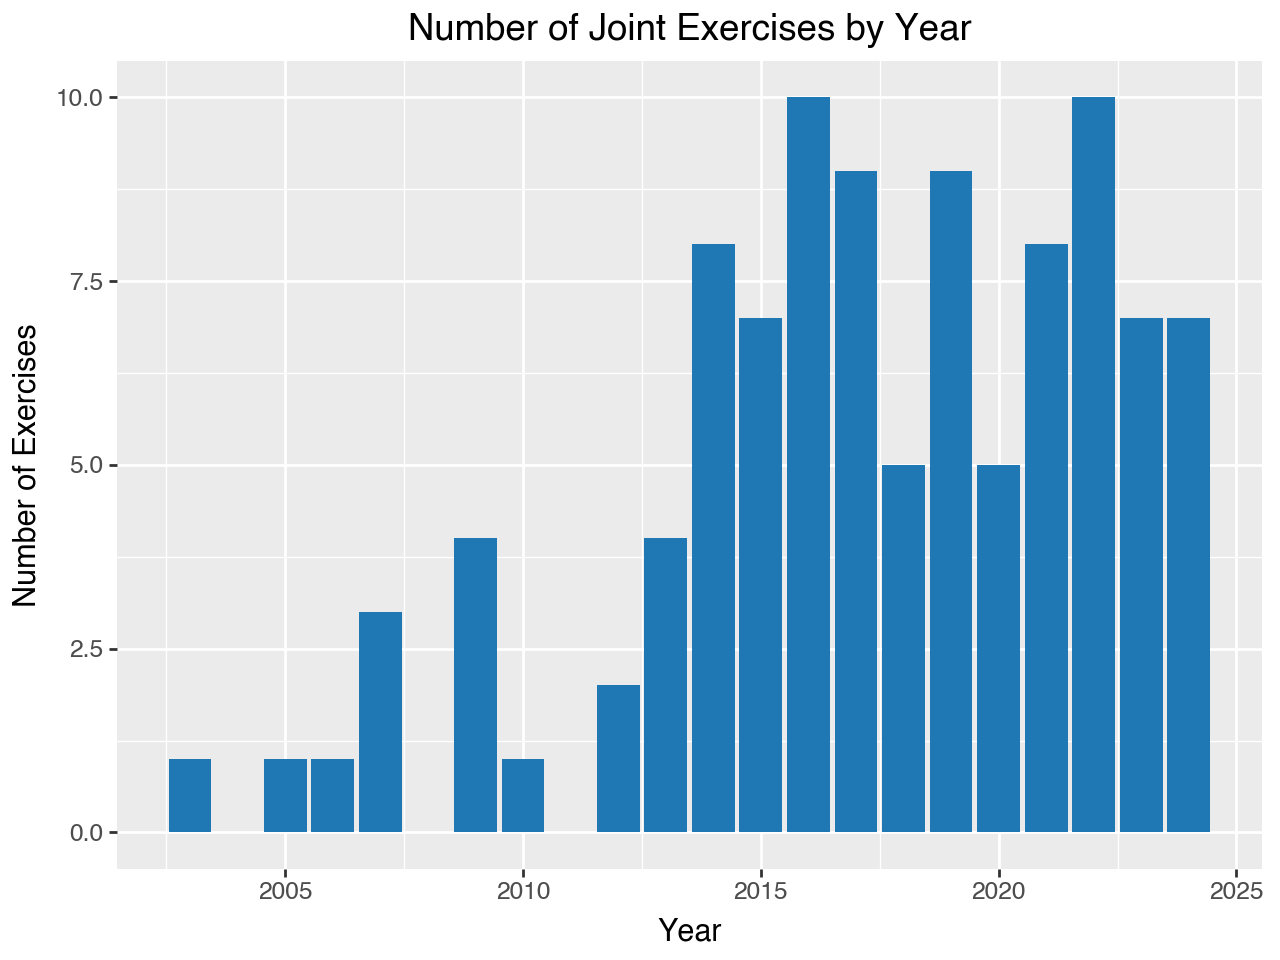

In [13]:
from plotnine import ggplot, aes, geom_bar, labs, theme_set, theme_538
from plotnine.data import mpg  # Example dataset

# Example plot using plotnine
(
    ggplot(data, aes(x='Year'))
    + geom_bar(fill="#1f78b4")
    + theme_set(theme_538())
    + labs(title="Number of Joint Exercises by Year", x="Year", y="Number of Exercises")
)



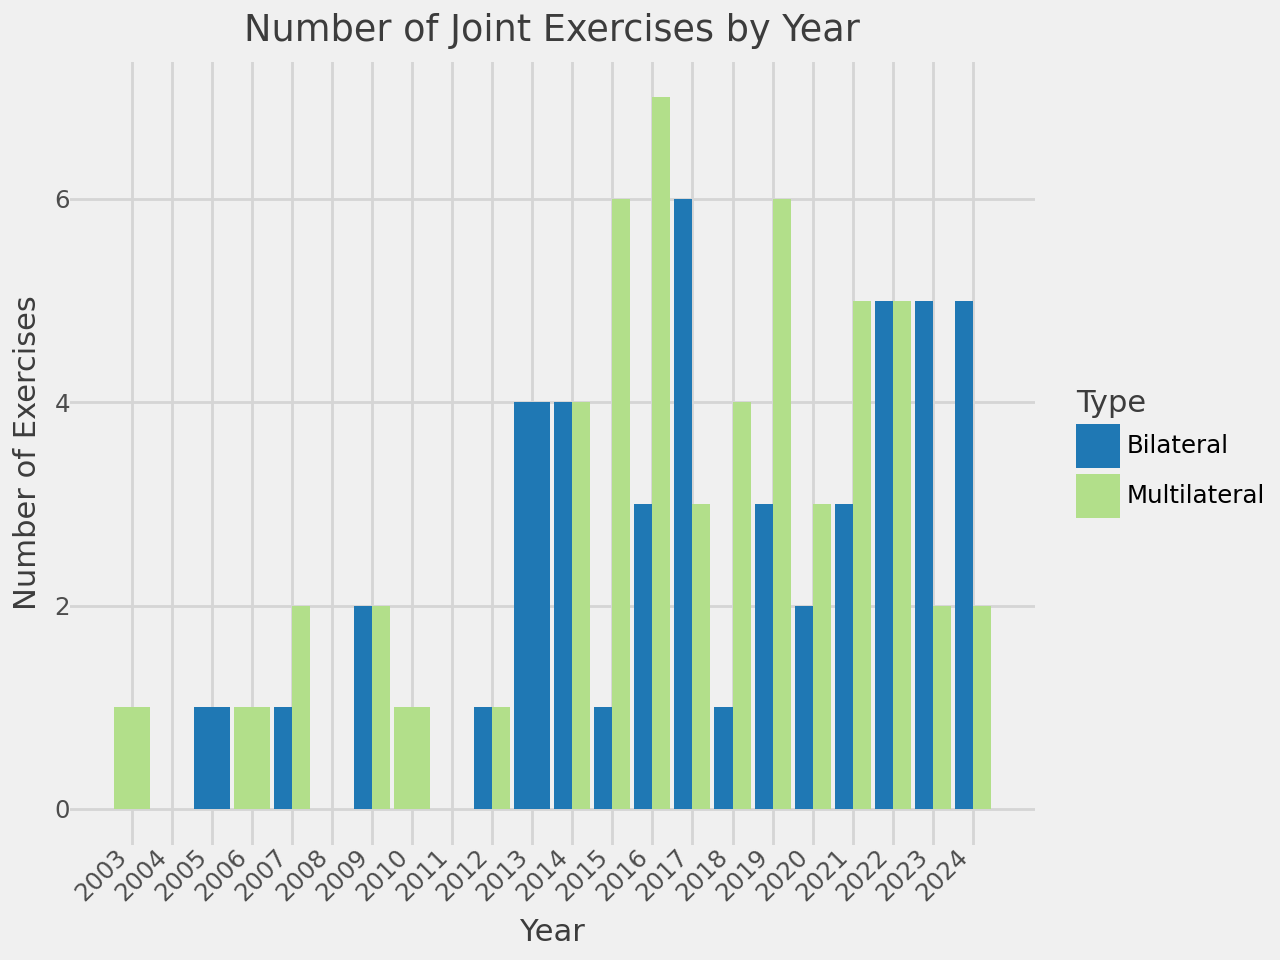

In [14]:
from plotnine import (
    ggplot, aes, geom_bar, labs, theme_set, theme_538, scale_x_continuous,
    theme, element_text, scale_fill_manual
)

(
    ggplot(data, aes(x='Year', fill='Bilateral/Multilateral'))
    + geom_bar(position='dodge')
    + scale_x_continuous(breaks=range(data['Year'].min(), data['Year'].max() + 1))
    + theme_set(theme_538())
    + scale_fill_manual(
        values=["#1f78b4", "#b2df8a"],  # Example custom colors
        name="Type"                    # Legend title
    )
    + labs(
        title="Number of Joint Exercises by Year",
        x="Year",
        y="Number of Exercises"
    )
    + theme(
        axis_text_x=element_text(rotation=45, hjust=1)
    )
)


In [15]:


# 1. Group and count
grouped = data.groupby(['Year', 'Bilateral/Multilateral']).size().reset_index(name='Count')

# 2. Pivot to get Bilateral/Multilateral as separate columns
summary_table = grouped.pivot(
    index='Year',
    columns='Bilateral/Multilateral',
    values='Count'
).fillna(0)  # Replace missing counts with 0 if necessary

# Optional: rename columns for clarity
summary_table.rename(
    columns={'Bilateral': 'Bilateral', 'Multilateral': 'Multilateral'},
    inplace=True
)

# Sort by Year just in case (if needed)
summary_table.sort_values(by='Year', inplace=True)

# Display the table
summary_table


Bilateral/Multilateral,Bilateral,Multilateral
Year,,
2003,0.0,1.0
2005,1.0,0.0
2006,0.0,1.0
2007,1.0,2.0
2009,2.0,2.0
2010,0.0,1.0
2012,1.0,1.0
2013,4.0,0.0
2014,4.0,4.0


In [16]:
# export summary_table
summary_table.to_csv('summary_table.csv')

# China Military Diplomacy Database

In [20]:
# import csv on Chinese military diplomacy
cmdexcelfile = pd.ExcelFile('/Users/Mary/Documents/GitHub/russia-china-relations/data/China Military Diplomacy DB 2002-2024 v499 02-14-2025 BETA.xlsx')
print(cmdexcelfile.sheet_names)

# Assuming the second sheet is the one with the data (index 1)
chinese_military_diplomacy = pd.read_excel('/Users/Mary/Documents/GitHub/russia-china-relations/data/China Military Diplomacy DB 2002-2024 v499 02-14-2025 BETA.xlsx', sheet_name=1)


['Codebook', 'PLA Military Diplomacy DB v499', 'Pivot Table', 'Appendix of Figures', 'PRC partnerships', 'CCMD Figure 1', 'CCMD Figure 3', 'CCMD Figure 7', 'CCMD Table 3 Pivot Table', 'CCMD Table 3', 'INDOPACOM Figure 2', 'INDOPACOM Figure 4', 'INDOPACOM Figure 5', 'INDOPACOM Figure 6', 'INDOPACOM Figure 7', 'AFRICOM Figure 2', 'AFRICOM Figure 4', 'AFRICOM Figure 5', 'AFRICOM Figure 6', 'SOUTHCOM Figure 2', 'SOUTHCOM Figure 4', 'SOUTHCOM Figure 5', 'SOUTHCOM Figure 6', 'CENTCOM Figure 2', 'CENTCOM Figure 4', 'CENTCOM Figure 5', 'CENTCOM Figure 6', 'EUCOM Figure 2', 'EUCOM Figure 4', 'EUCOM Figure 5', 'EUCOM Figure 6', 'Europe Figure 2', 'Europe Figure 4', 'NORTHCOM Figure 2', 'NORTHCOM Figure 4', 'NORTHCOM Figure 5', 'NORTHCOM Figure 6', 'Figure 1-2', 'Figure 3-4', 'Figure 5-6', 'Figure 7-8', 'Figure 9-10', 'Figure 11-12', 'Figure 13-14', 'Figure 15', 'Figure 16', 'Figure 17', 'Figure 17-18', 'Figure 19', 'Figure 20', 'Table 1-2', 'Table 3-4', 'Table 1A-2A NATO', 'Table 3A-4A NATO', 'T

In [21]:
chinese_military_diplomacy.head()

,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,U.S. Collective Defense Status,US CCMD AOR,Partner Country,Year,Month,Activity Type,...,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Port Call Voyage Identifier,Associated Fleet,Port Call Details,Source,Comments,Unnamed: 26
0,Naval Port Call,South Asia,Asia,No Specific Relationship,NaN,INDOPACOM,Bangladesh,1985,11.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1985-11 DD132 Hefei,East Sea Fleet,Hefei-132 and Fengcang-615,NaN,NaN,NaN
1,Naval Port Call,Southeast Asia,Asia,No Specific Relationship,NaN,INDOPACOM,Myanmar,1985,11.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1985,Unknown,???,NaN,NaN,NaN
2,Naval Port Call,South Asia,Asia,No Specific Relationship,Major Non-NATO Ally,CENTCOM,Pakistan,1985,11.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1985-11 DD132 Hefei,East Sea Fleet,Hefei-132 and Fengcang-615,NaN,NaN,NaN
3,Naval Port Call,South Asia,Asia,No Specific Relationship,NaN,INDOPACOM,Sri Lanka,1985,11.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1985-11 DD132 Hefei,East Sea Fleet,Hefei-132 and Fengcang-615,NaN,NaN,NaN
4,Naval Port Call,North America,America and Oceania,No Specific Relationship,NaN,NORTHCOM,United States,1989,3.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1989-03 Zhenghe,North Sea Fleet,Zhenghe training ship,NaN,NaN,NaN


In [22]:
chinese_military_diplomacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Activity Category               3375 non-null   object 
 1   Geographic Region               3373 non-null   object 
 2   Region (MND FAO)                3368 non-null   object 
 3   PRC Relationship Category       3357 non-null   object 
 4   U.S. Collective Defense Status  1122 non-null   object 
 5   US CCMD AOR                     3373 non-null   object 
 6   Partner Country                 3360 non-null   object 
 7   Year                            3375 non-null   int64  
 8   Month                           3374 non-null   float64
 9   Activity Type                   3375 non-null   object 
 10  Person                          2496 non-null   object 
 11  Trip Count - Abroad             0 non-null      float64
 12  Position                        25

In [23]:
chinese_military_diplomacy['Partner Country'].unique()

array(['Bangladesh', 'Myanmar', 'Pakistan', 'Sri Lanka', 'United States',
       'Thailand', 'India', 'Russia', 'Indonesia', 'North Korea',
       'Malaysia', 'Philippines', 'Australia', 'New Zealand', 'SCO',
       'South Africa', 'Tanzania', 'Canada', 'Germany', 'Hong Kong',
       'Italy', 'United Kingdom', 'France', 'Vietnam', 'Egypt',
       'South Korea', 'Ukraine', 'Morocco', 'Congo', 'Greece',
       'Kazakhstan', 'Kyrgyzstan', 'Nepal', 'Romania', 'Belarus',
       'Croatia', 'Nigeria', 'Norway', 'Turkey', 'Singapore', 'Slovakia',
       'Antigua and Barbuda', 'Bolivia', 'Brazil', 'Brunei', 'Colombia',
       'Equatorial Guinea', 'Kenya', 'Portugal', 'Cuba', 'East Timor',
       'Ecuador', 'Laos', 'Mongolia', 'Peru', 'Turkmenistan', 'Venezuela',
       'Azerbaijan', 'Czech Republic', 'Poland', 'Tajikistan', 'Zambia',
       'Argentina', 'Armenia', 'Benin', 'Cameroon', 'Chile', 'Gabon',
       'Belgium', 'Namibia', 'Spain', 'Eritrea', 'Kuwait', 'Uzbekistan',
       'Sudan', 'Tri

In [24]:
chinese_military_diplomacy[
    (chinese_military_diplomacy['Activity Type'] == 'Military Exercise - Multilateral') &
    (chinese_military_diplomacy['MilEx Details'].str.contains('Russia', case=False, na=False))
]



,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,U.S. Collective Defense Status,US CCMD AOR,Partner Country,Year,Month,Activity Type,...,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Port Call Voyage Identifier,Associated Fleet,Port Call Details,Source,Comments,Unnamed: 26
596,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2006,3.0,Military Exercise - Multilateral,...,Anti-terrorism,East-Antiterror-2006,Army,Special forces anti-terrorism exercise in Uzbe...,NaN,NaN,NaN,https://jamestown.org/program/uzbekistan-hosts...,NaN,NaN
790,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2007,5.0,Military Exercise - Multilateral,...,Anti-terrorism,Issyuk-Kul Antiterror-2007,Army,anti-terrorism exercise in Kyrgyzstan; Countri...,NaN,NaN,NaN,de Haas Journal of Slavic Military Studies 29:...,NaN,NaN
846,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2007,8.0,Military Exercise - Multilateral,...,Combat,Peace Mission 2007,Joint,"Army, Navy, Air Force, SOF. Countries: Russia,...",NaN,NaN,NaN,http://en.people.cn/90002/91620/index.html,NaN,NaN
1343,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2010,9.0,Military Exercise - Multilateral,...,Combat,Peace Mission 2010,Joint,"Army, Navy, Air Force, SOF; anti-terrorism. Ot...",NaN,NaN,NaN,https://jamestown.org/program/chinas-growing-c...,NaN,NaN
1639,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2012,6.0,Military Exercise - Multilateral,...,Combat,Peace Mission 2012,Joint,"Army, Navy, Air Force, SOF; anti-terrorism. Ot...",NaN,NaN,NaN,https://web.archive.org/web/20120609071043/htt...,NaN,NaN
1977,Military Exercise,Russia,Europe and Central Asia,Comprehensive Collaborative Strategic Partners...,NaN,EUCOM,Russia,2014,8.0,Military Exercise - Multilateral,...,Competition,Tank Biathlon 2014,Army,Competition; Russia and 11 other countries,NaN,NaN,NaN,NaN,NaN,NaN
1979,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2014,8.0,Military Exercise - Multilateral,...,Combat,Peace Mission 2014,Joint,"Army, Navy, Air Force, SOF; anti-terrorism. Ot...",NaN,NaN,NaN,http://eng.mod.gov.cn/DefenseNews/2014-08/28/c...,NaN,NaN
2100,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2015,4.0,Military Exercise - Multilateral,...,Anti-terrorism,NaN,Army,"SCO anti-terrorism; Kazakhstan, Kyrgyzstan, Ta...",NaN,NaN,NaN,NaN,NaN,NaN
2188,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2015,9.0,Military Exercise - Multilateral,...,Anti-terrorism,NaN,Army,SCO anti-terrorism joint-command staff exercis...,NaN,NaN,NaN,de Haas Journal of Slavic Military Studies 29:...,NaN,NaN
2296,Military Exercise,Southeast Asia,Asia,Comprehensive Strategic Partnership [全面战略伙伴关系],NaN,INDOPACOM,Indonesia,2016,4.0,Military Exercise - Multilateral,...,Combat Support,NaN,Navy,"port-and-shore activities, maritime drills, en...",NaN,NaN,NaN,NaN,NaN,NaN


## Multilateral Exercises with RF Participation

In [25]:
multilat_exercises_withRF = chinese_military_diplomacy[
    (chinese_military_diplomacy['Activity Type'] == 'Military Exercise - Multilateral')
    &
    (
        (chinese_military_diplomacy['MilEx Details'].str.contains('Russia', case=False, na=False))
        |
        (chinese_military_diplomacy['Partner Country'] == 'Russia')
    )
]


In [26]:
multilat_exercises_withRF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 596 to 3228
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Activity Category               34 non-null     object 
 1   Geographic Region               34 non-null     object 
 2   Region (MND FAO)                34 non-null     object 
 3   PRC Relationship Category       33 non-null     object 
 4   U.S. Collective Defense Status  0 non-null      object 
 5   US CCMD AOR                     34 non-null     object 
 6   Partner Country                 33 non-null     object 
 7   Year                            34 non-null     int64  
 8   Month                           34 non-null     float64
 9   Activity Type                   34 non-null     object 
 10  Person                          0 non-null      object 
 11  Trip Count - Abroad             0 non-null      float64
 12  Position                        2 non-n

In [27]:
multilat_exercises_withRF['Partner Country'].unique()

array(['SCO', 'Russia', 'Indonesia', nan, 'ASEAN', 'South Africa', 'Iran'],
      dtype=object)

From 2006 to 2024, Russia led or participated in 34 multilateral military exercises.  Other leaders included the SCO, Indonesia, ASEAN, South Africa, and Iran.


In [28]:
# sort multilat_exercises_withRF by year
multilat_exercises_withRF.sort_values(by='Year', inplace=True)
multilat_exercises_withRF

/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/2900004936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,U.S. Collective Defense Status,US CCMD AOR,Partner Country,Year,Month,Activity Type,...,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Port Call Voyage Identifier,Associated Fleet,Port Call Details,Source,Comments,Unnamed: 26
596,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2006,3.0,Military Exercise - Multilateral,...,Anti-terrorism,East-Antiterror-2006,Army,Special forces anti-terrorism exercise in Uzbe...,NaN,NaN,NaN,https://jamestown.org/program/uzbekistan-hosts...,NaN,NaN
790,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2007,5.0,Military Exercise - Multilateral,...,Anti-terrorism,Issyuk-Kul Antiterror-2007,Army,anti-terrorism exercise in Kyrgyzstan; Countri...,NaN,NaN,NaN,de Haas Journal of Slavic Military Studies 29:...,NaN,NaN
846,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2007,8.0,Military Exercise - Multilateral,...,Combat,Peace Mission 2007,Joint,"Army, Navy, Air Force, SOF. Countries: Russia,...",NaN,NaN,NaN,http://en.people.cn/90002/91620/index.html,NaN,NaN
1343,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2010,9.0,Military Exercise - Multilateral,...,Combat,Peace Mission 2010,Joint,"Army, Navy, Air Force, SOF; anti-terrorism. Ot...",NaN,NaN,NaN,https://jamestown.org/program/chinas-growing-c...,NaN,NaN
1639,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2012,6.0,Military Exercise - Multilateral,...,Combat,Peace Mission 2012,Joint,"Army, Navy, Air Force, SOF; anti-terrorism. Ot...",NaN,NaN,NaN,https://web.archive.org/web/20120609071043/htt...,NaN,NaN
1961,Military Exercise,Russia,Europe and Central Asia,Comprehensive Collaborative Strategic Partners...,NaN,EUCOM,Russia,2014,7.0,Military Exercise - Multilateral,...,Competition,Aviadarts 2014,Air Force,Competition. Other countries: Belarus,NaN,NaN,NaN,https://usa.mfa.gov.ua/en/news/22977-zajava-mz...,NaN,NaN
1977,Military Exercise,Russia,Europe and Central Asia,Comprehensive Collaborative Strategic Partners...,NaN,EUCOM,Russia,2014,8.0,Military Exercise - Multilateral,...,Competition,Tank Biathlon 2014,Army,Competition; Russia and 11 other countries,NaN,NaN,NaN,NaN,NaN,NaN
1979,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2014,8.0,Military Exercise - Multilateral,...,Combat,Peace Mission 2014,Joint,"Army, Navy, Air Force, SOF; anti-terrorism. Ot...",NaN,NaN,NaN,http://eng.mod.gov.cn/DefenseNews/2014-08/28/c...,NaN,NaN
2100,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2015,4.0,Military Exercise - Multilateral,...,Anti-terrorism,NaN,Army,"SCO anti-terrorism; Kazakhstan, Kyrgyzstan, Ta...",NaN,NaN,NaN,NaN,NaN,NaN
2164,Military Exercise,Russia,Europe and Central Asia,Comprehensive Collaborative Strategic Partners...,NaN,EUCOM,Russia,2015,8.0,Military Exercise - Multilateral,...,Competition,International Army Games 2015,Army,"Competition; Army, AF, Navy",NaN,NaN,NaN,http://mil.ru/files/files/armygames/index_en.html,MAIN ENTRY FOR IAG2015--coded as Army despite ...,NaN


In [29]:
# generate table from multilat_exercises_withRF by year
multilat_exercises_withRF['Year'].value_counts().sort_index()

Year
2006    1
2007    2
2010    1
2012    1
2014    3
2015    3
2016    3
2017    1
2018    3
2019    5
2020    2
2021    2
2022    3
2023    3
2024    1
Name: count, dtype: int64

## All Exercises with Russian Participation

In [30]:
# All exercises with RF

# Condition 1: Multilateral exercises where MilEx Details contains "Russia" OR Partner Country == "Russia"
cond_multilat_with_russia = (
    (chinese_military_diplomacy['Activity Type'] == 'Military Exercise - Multilateral')
    &
    (
        chinese_military_diplomacy['MilEx Details'].str.contains('Russia', case=False, na=False)
        | (chinese_military_diplomacy['Partner Country'] == 'Russia')
    )
)

# Condition 2: Bilateral exercises where Partner Country == "Russia"
cond_bilat_with_russia = (
    (chinese_military_diplomacy['Activity Type'] == 'Military Exercise - Bilateral')
    & (chinese_military_diplomacy['Partner Country'] == 'Russia')
)

# Combine both conditions with OR
exercisesWithRF = chinese_military_diplomacy[cond_multilat_with_russia | cond_bilat_with_russia]

# View first few rows
exercisesWithRF.head()


,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,U.S. Collective Defense Status,US CCMD AOR,Partner Country,Year,Month,Activity Type,...,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Port Call Voyage Identifier,Associated Fleet,Port Call Details,Source,Comments,Unnamed: 26
514,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2005,8.0,Military Exercise - Bilateral,...,Combat,Peace Mission 2005,Joint,"Army, Navy, Air Force, SOF; nominal anti-terro...",NaN,NaN,NaN,Defense White Paper Appendix,"Under SCO auspices, but coded as Russia becaus...",NaN
596,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2006,3.0,Military Exercise - Multilateral,...,Anti-terrorism,East-Antiterror-2006,Army,Special forces anti-terrorism exercise in Uzbe...,NaN,NaN,NaN,https://jamestown.org/program/uzbekistan-hosts...,NaN,NaN
790,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2007,5.0,Military Exercise - Multilateral,...,Anti-terrorism,Issyuk-Kul Antiterror-2007,Army,anti-terrorism exercise in Kyrgyzstan; Countri...,NaN,NaN,NaN,de Haas Journal of Slavic Military Studies 29:...,NaN,NaN
846,Military Exercise,Central Asia,Europe and Central Asia,Member,NaN,CENTCOM,SCO,2007,8.0,Military Exercise - Multilateral,...,Combat,Peace Mission 2007,Joint,"Army, Navy, Air Force, SOF. Countries: Russia,...",NaN,NaN,NaN,http://en.people.cn/90002/91620/index.html,NaN,NaN
862,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2007,9.0,Military Exercise - Bilateral,...,Anti-terrorism,Cooperation 2007,PAP,Snow Leopard commando unit,NaN,NaN,NaN,https://www.jstor.org/stable/resrep11945.11?se...,NaN,NaN


In [31]:
exercisesWithRF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 514 to 3371
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Activity Category               79 non-null     object 
 1   Geographic Region               79 non-null     object 
 2   Region (MND FAO)                79 non-null     object 
 3   PRC Relationship Category       78 non-null     object 
 4   U.S. Collective Defense Status  0 non-null      object 
 5   US CCMD AOR                     79 non-null     object 
 6   Partner Country                 78 non-null     object 
 7   Year                            79 non-null     int64  
 8   Month                           79 non-null     float64
 9   Activity Type                   79 non-null     object 
 10  Person                          0 non-null      object 
 11  Trip Count - Abroad             0 non-null      float64
 12  Position                        2 non-n

In [32]:
# correct data errors in MilEx Type



# Create a dictionary for replacements
replacement_dict = {
    'Anti-piracy': 'Anti-Piracy',
    'Anti-terrorism': 'Anti-Terrorism'
}

# Use the replace method to perform the replacements in the 'MilEx Type' column
exercisesWithRF['MilEx Type'] = exercisesWithRF['MilEx Type'].replace(replacement_dict)

# Verify the replacements
print(exercisesWithRF['MilEx Type'].unique())

['Combat' 'Anti-Terrorism' 'Anti-Piracy' 'MOOTW' 'Competition'
 'Combat Support' 'Strategic CPX' 'Patrol']


/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/1083248468.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
exercisesWithRF['Activity Type'].unique()

array(['Military Exercise - Bilateral',
       'Military Exercise - Multilateral'], dtype=object)

In [34]:
# Count the number of each type of military exercise
exercise_counts = exercisesWithRF['Activity Type'].value_counts()

# Print the counts
print(exercise_counts)


Activity Type
Military Exercise - Bilateral       45
Military Exercise - Multilateral    34
Name: count, dtype: int64


In [36]:
# drop all columns with 0 non-null entries
exercisesWithRF.dropna(axis=1, how='all', inplace=True)
exercisesWithRF.head()

/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/4270027052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,US CCMD AOR,Partner Country,Year,Month,Activity Type,Position,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Source,Comments,Unnamed: 26
514,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2005,8.0,Military Exercise - Bilateral,NaN,Combat,Peace Mission 2005,Joint,"Army, Navy, Air Force, SOF; nominal anti-terro...",Defense White Paper Appendix,"Under SCO auspices, but coded as Russia becaus...",NaN
596,Military Exercise,Central Asia,Europe and Central Asia,Member,CENTCOM,SCO,2006,3.0,Military Exercise - Multilateral,NaN,Anti-Terrorism,East-Antiterror-2006,Army,Special forces anti-terrorism exercise in Uzbe...,https://jamestown.org/program/uzbekistan-hosts...,NaN,NaN
790,Military Exercise,Central Asia,Europe and Central Asia,Member,CENTCOM,SCO,2007,5.0,Military Exercise - Multilateral,NaN,Anti-Terrorism,Issyuk-Kul Antiterror-2007,Army,anti-terrorism exercise in Kyrgyzstan; Countri...,de Haas Journal of Slavic Military Studies 29:...,NaN,NaN
846,Military Exercise,Central Asia,Europe and Central Asia,Member,CENTCOM,SCO,2007,8.0,Military Exercise - Multilateral,NaN,Combat,Peace Mission 2007,Joint,"Army, Navy, Air Force, SOF. Countries: Russia,...",http://en.people.cn/90002/91620/index.html,NaN,NaN
862,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2007,9.0,Military Exercise - Bilateral,NaN,Anti-Terrorism,Cooperation 2007,PAP,Snow Leopard commando unit,https://www.jstor.org/stable/resrep11945.11?se...,NaN,NaN


In [37]:
# sort exercisesWithRF by year
exercisesWithRF.sort_values(by='Year', inplace=True)
exercisesWithRF

/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/325067771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,US CCMD AOR,Partner Country,Year,Month,Activity Type,Position,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Source,Comments,Unnamed: 26
514,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2005,8.0,Military Exercise - Bilateral,NaN,Combat,Peace Mission 2005,Joint,"Army, Navy, Air Force, SOF; nominal anti-terro...",Defense White Paper Appendix,"Under SCO auspices, but coded as Russia becaus...",NaN
596,Military Exercise,Central Asia,Europe and Central Asia,Member,CENTCOM,SCO,2006,3.0,Military Exercise - Multilateral,NaN,Anti-Terrorism,East-Antiterror-2006,Army,Special forces anti-terrorism exercise in Uzbe...,https://jamestown.org/program/uzbekistan-hosts...,NaN,NaN
790,Military Exercise,Central Asia,Europe and Central Asia,Member,CENTCOM,SCO,2007,5.0,Military Exercise - Multilateral,NaN,Anti-Terrorism,Issyuk-Kul Antiterror-2007,Army,anti-terrorism exercise in Kyrgyzstan; Countri...,de Haas Journal of Slavic Military Studies 29:...,NaN,NaN
846,Military Exercise,Central Asia,Europe and Central Asia,Member,CENTCOM,SCO,2007,8.0,Military Exercise - Multilateral,NaN,Combat,Peace Mission 2007,Joint,"Army, Navy, Air Force, SOF. Countries: Russia,...",http://en.people.cn/90002/91620/index.html,NaN,NaN
862,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2007,9.0,Military Exercise - Bilateral,NaN,Anti-Terrorism,Cooperation 2007,PAP,Snow Leopard commando unit,https://www.jstor.org/stable/resrep11945.11?se...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,Military Exercise,Russia,Europe and Central Asia,Comprehensive Strategic Partnership of Coordi...,EUCOM,Russia,2024,7.0,Military Exercise - Bilateral,NaN,Patrol,Joint Strategic Aerial Patrol I,Air Force,8th joint Strategic air patrol. Two Chinese H-...,https://apnews.com/article/china-russia-us-mil...,9th China-Russia air patrol,NaN
3281,Military Exercise,Russia,Europe and Central Asia,Comprehensive Strategic Partnership of Coordi...,EUCOM,Russia,2024,7.0,Military Exercise - Bilateral,NaN,Patrol,Joint Maritime Cruise 2024-I,Navy,The joint patrol featured the Russian corvette...,https://www.globaltimes.cn/page/202407/1315995...,"4th Joint Maritime Patrol, in the Western and ...",NaN
3283,Military Exercise,Russia,Europe and Central Asia,Comprehensive Strategic Partnership of Coordin...,EUCOM,Russia,2024,7.0,Military Exercise - Bilateral,NaN,Combat,Joint Sea 2024,Navy,"exercise near Zhanjiang City, Guangdong",http://eng.chinamil.com.cn/CHINA_209163/TopSto...,NaN,NaN
3323,Military Exercise,Russia,Europe and Central Asia,Comprehensive Strategic Partnership of Coordi...,EUCOM,Russia,2024,9.0,Military Exercise - Bilateral,NaN,Combat,Northern Interaction-2024,Joint,Joint maritime defense operations. Improve org...,http://eng.chinamil.com.cn/CHINA_209163/Exerci...,The closing ceremony of the China-Russia North...,NaN


In [38]:
# prompt: number of exercises with Russia by year

import pandas as pd

# Assuming 'exercisesWithRF' DataFrame is already created as in the provided code.
# If not, execute the code from the previous response to create it.

# Group by year and count the exercises
exercises_by_year = exercisesWithRF.groupby('Year').size().reset_index(name='Number of Exercises')

# Print the result
exercises_by_year

,Year,Number of Exercises
0,2005,1
1,2006,1
2,2007,3
3,2009,3
4,2010,1
5,2012,2
6,2013,5
7,2014,6
8,2015,5
9,2016,6


In [39]:
# prompt: using "exercises by year" get number of bilateral and number of multilateral exercises per year

# Assuming 'exercisesWithRF' DataFrame is already created as in the provided code.
# If not, execute the code from the previous response to create it.

# Group by year and exercise type, then count
exercises_by_year_type = exercisesWithRF.groupby(['Year', 'Activity Type']).size().reset_index(name='Count')

# Pivot the table to have separate columns for Bilateral and Multilateral
pivot_table = exercises_by_year_type.pivot(index='Year', columns='Activity Type', values='Count').fillna(0)

# Display the table
pivot_table

Activity Type,Military Exercise - Bilateral,Military Exercise - Multilateral
Year,,
2005,1.0,0.0
2006,0.0,1.0
2007,1.0,2.0
2009,3.0,0.0
2010,0.0,1.0
2012,1.0,1.0
2013,5.0,0.0
2014,3.0,3.0
2015,2.0,3.0


##### types of exercises


In [40]:
exercisesWithRF['MilEx Type'].unique()

array(['Combat', 'Anti-Terrorism', 'Anti-Piracy', 'MOOTW', 'Competition',
       'Combat Support', 'Strategic CPX', 'Patrol'], dtype=object)

In [41]:
# Group by year and exercise type, then count
exercises_by_year_type = exercisesWithRF.groupby(['Year', 'MilEx Type']).size().reset_index(name='Count')

# Pivot the table to have separate columns for each MilEx Type
pivot_table_exercisetype = exercises_by_year_type.pivot(index='Year', columns='MilEx Type', values='Count').fillna(0)

# Display the table
pivot_table_exercisetype

MilEx Type,Anti-Piracy,Anti-Terrorism,Combat,Combat Support,Competition,MOOTW,Patrol,Strategic CPX
Year,,,,,,,,
2005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2009,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2010,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0
2014,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
2015,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0


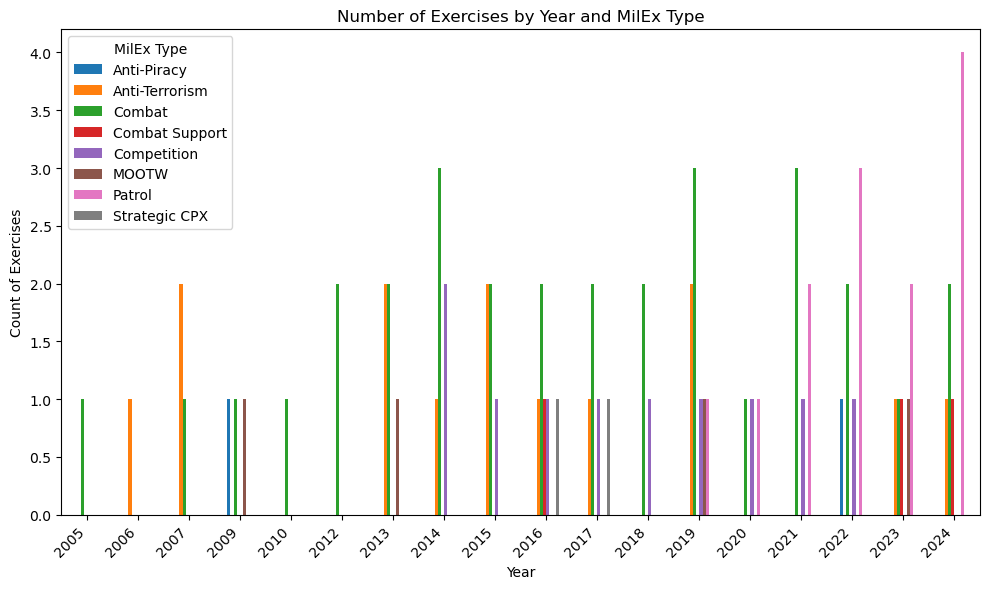

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'exercisesWithRF' DataFrame is already created as in the notebook.
# If not, execute the code from the previous response to create it.

# Group by year and exercise type, then count
exercises_by_year_type = exercisesWithRF.groupby(['Year', 'MilEx Type']).size().reset_index(name='Count')

# Pivot the table to have separate columns for each MilEx Type
pivot_table_exercisetype = exercises_by_year_type.pivot(index='Year', columns='MilEx Type', values='Count').fillna(0)


# Create the plot
pivot_table_exercisetype.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Number of Exercises by Year and MilEx Type')
plt.xlabel('Year')
plt.ylabel('Count of Exercises')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='MilEx Type')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

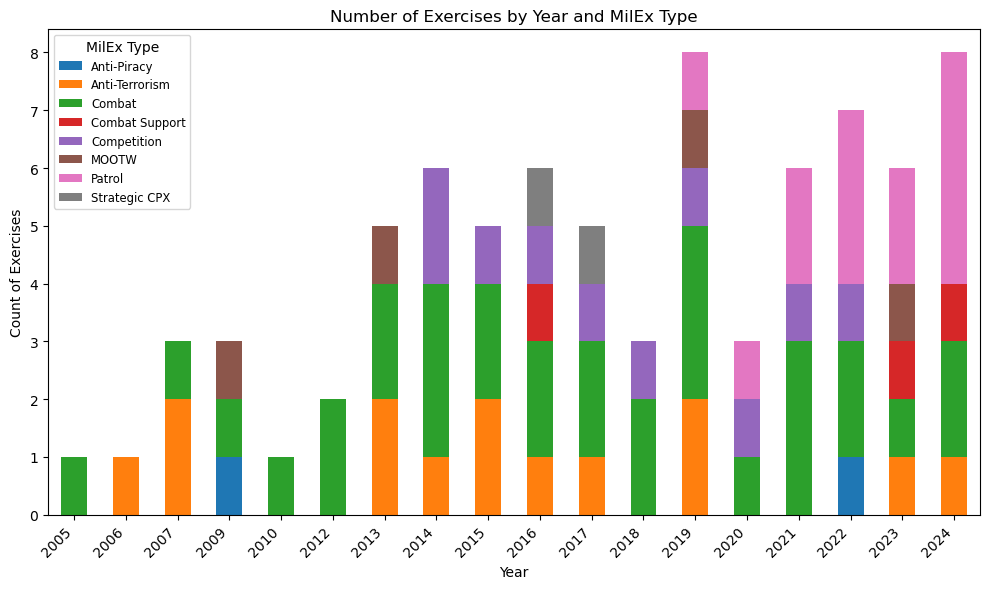

In [43]:
# change plot to stacked barplot




# Create the plot
pivot_table_exercisetype.plot(kind='bar', stacked = True, figsize=(10, 6))

# Customize the plot
plt.title('Number of Exercises by Year and MilEx Type')
plt.xlabel('Year')
plt.ylabel('Count of Exercises')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='MilEx Type', fontsize = 'small')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

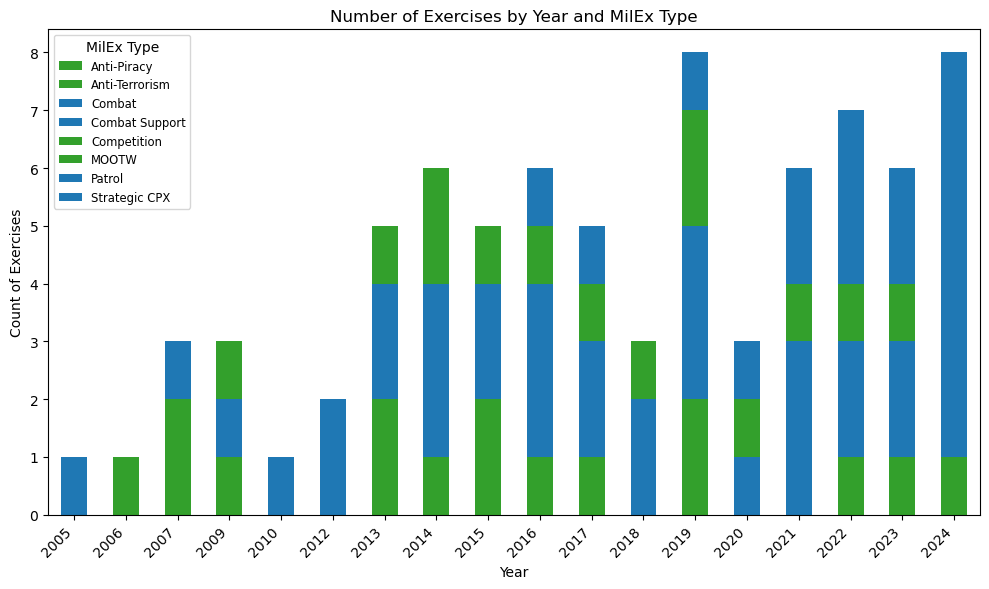

In [44]:
# group into combat related and non-combat related

# Define the categories and their respective colors
primary_categories = ['Combat', 'Combat Support', 'Patrol', 'Strategic CPX']
secondary_categories = ['Anti-Piracy', 'Anti-Terrorism', 'Competition', 'MOOTW']
primary_color = '#1f78b4'  # Choose a color for the primary categories
secondary_color = '#33a02c'  # Choose a different color for secondary categories

# Create a color mapping dictionary
color_map = {}

# Assign colors based on category membership
for category in pivot_table_exercisetype.columns:
    if category in primary_categories:
        color_map[category] = primary_color
    elif category in secondary_categories:
        color_map[category] = secondary_color
    else:
       color_map[category] = 'gray'  # for any other categories

# Create a list of colors based on the order of the columns
colors = [color_map[category] for category in pivot_table_exercisetype.columns]

# Create the plot, assigning colors
pivot_table_exercisetype.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Customize the plot
plt.title('Number of Exercises by Year and MilEx Type')
plt.xlabel('Year')
plt.ylabel('Count of Exercises')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='MilEx Type', fontsize='small')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [45]:
# create copy of exercisesWithRF and combine MilEx Type to two choices:  combat-related and non-combat related



# Define the categories
primary_categories = ['Combat', 'Combat Support', 'Patrol', 'Strategic CPX']
secondary_categories = ['Anti-Piracy', 'Anti-Terrorism', 'Competition', 'MOOTW']

# Create a copy of the dataframe to avoid modifying the original
exercisesWithRF_copy = exercisesWithRF.copy()

# Function to categorize the exercises
def categorize_exercise(mil_ex_type):
    if mil_ex_type in primary_categories:
        return 'Combat-Related'
    elif mil_ex_type in secondary_categories:
        return 'Non-Combat-Related'
    else:
        return 'Other'  # Handle any other categories if needed


# Apply the function to create a new 'Exercise Type' column
exercisesWithRF_copy['Exercise Type'] = exercisesWithRF_copy['MilEx Type'].apply(categorize_exercise)

# Drop rows with 'Other'
exercisesWithRF_copy = exercisesWithRF_copy[exercisesWithRF_copy['Exercise Type'] != 'Other']

# Display the modified DataFrame
exercisesWithRF_copy.head()



,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,US CCMD AOR,Partner Country,Year,Month,Activity Type,Position,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Source,Comments,Unnamed: 26,Exercise Type
514,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2005,8.0,Military Exercise - Bilateral,NaN,Combat,Peace Mission 2005,Joint,"Army, Navy, Air Force, SOF; nominal anti-terro...",Defense White Paper Appendix,"Under SCO auspices, but coded as Russia becaus...",NaN,Combat-Related
596,Military Exercise,Central Asia,Europe and Central Asia,Member,CENTCOM,SCO,2006,3.0,Military Exercise - Multilateral,NaN,Anti-Terrorism,East-Antiterror-2006,Army,Special forces anti-terrorism exercise in Uzbe...,https://jamestown.org/program/uzbekistan-hosts...,NaN,NaN,Non-Combat-Related
790,Military Exercise,Central Asia,Europe and Central Asia,Member,CENTCOM,SCO,2007,5.0,Military Exercise - Multilateral,NaN,Anti-Terrorism,Issyuk-Kul Antiterror-2007,Army,anti-terrorism exercise in Kyrgyzstan; Countri...,de Haas Journal of Slavic Military Studies 29:...,NaN,NaN,Non-Combat-Related
846,Military Exercise,Central Asia,Europe and Central Asia,Member,CENTCOM,SCO,2007,8.0,Military Exercise - Multilateral,NaN,Combat,Peace Mission 2007,Joint,"Army, Navy, Air Force, SOF. Countries: Russia,...",http://en.people.cn/90002/91620/index.html,NaN,NaN,Combat-Related
862,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2007,9.0,Military Exercise - Bilateral,NaN,Anti-Terrorism,Cooperation 2007,PAP,Snow Leopard commando unit,https://www.jstor.org/stable/resrep11945.11?se...,NaN,NaN,Non-Combat-Related


In [46]:
exercisesWithRF_copy['Exercise Type'].unique()

array(['Combat-Related', 'Non-Combat-Related'], dtype=object)

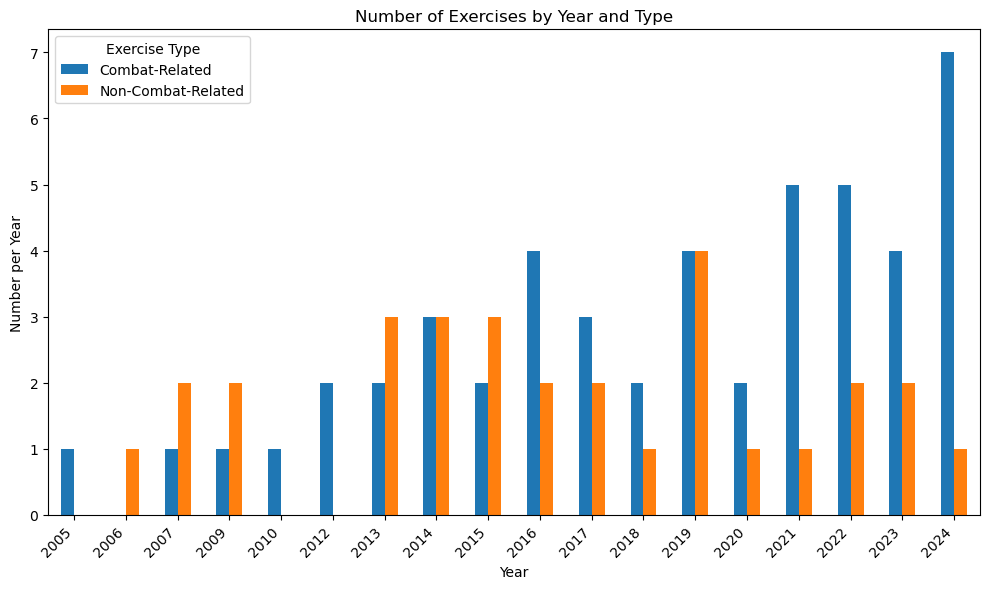

In [47]:

# Group by year and exercise type, then count
exercises_by_year_type_binomial = exercisesWithRF_copy.groupby(['Year', 'Exercise Type']).size().reset_index(name='Count')

# Pivot the table to have separate columns for each MilEx Type
pivot_table_exercisetype_binomial = exercises_by_year_type_binomial.pivot(index='Year',
          columns='Exercise Type', values='Count').fillna(0)


# Create the plot
pivot_table_exercisetype_binomial.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Number of Exercises by Year and Type')
plt.xlabel('Year')
plt.ylabel('Number per Year')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Exercise Type')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [48]:
# eliminate all exercises that are not combat, combat support, patrol, or
# strategic cpx

# Define the list of MilEx Types to keep
categories_to_keep = ['Combat', 'Combat Support', 'Patrol', 'Strategic CPX']

# Filter the DataFrame to keep only the desired categories
exercisesWithRF_keytypesonly = exercisesWithRF[exercisesWithRF['MilEx Type'].isin(categories_to_keep)]

# Display the updated DataFrame
exercisesWithRF_keytypesonly.head()

,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,US CCMD AOR,Partner Country,Year,Month,Activity Type,Position,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Source,Comments,Unnamed: 26
514,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2005,8.0,Military Exercise - Bilateral,NaN,Combat,Peace Mission 2005,Joint,"Army, Navy, Air Force, SOF; nominal anti-terro...",Defense White Paper Appendix,"Under SCO auspices, but coded as Russia becaus...",NaN
846,Military Exercise,Central Asia,Europe and Central Asia,Member,CENTCOM,SCO,2007,8.0,Military Exercise - Multilateral,NaN,Combat,Peace Mission 2007,Joint,"Army, Navy, Air Force, SOF. Countries: Russia,...",http://en.people.cn/90002/91620/index.html,NaN,NaN
1123,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2009,7.0,Military Exercise - Bilateral,NaN,Combat,Peace Mission 2009,Joint,"Army, Navy, Air Force, SOF; anti-terrorism; Pa...",Defense White Paper Appendix,"Under SCO auspices, but coded as Russia becaus...",NaN
1343,Military Exercise,Central Asia,Europe and Central Asia,Member,CENTCOM,SCO,2010,9.0,Military Exercise - Multilateral,NaN,Combat,Peace Mission 2010,Joint,"Army, Navy, Air Force, SOF; anti-terrorism. Ot...",https://jamestown.org/program/chinas-growing-c...,NaN,NaN
1610,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2012,4.0,Military Exercise - Bilateral,NaN,Combat,Maritime Cooperation 2012 (aka Joint Sea 2012),Navy,Maritime; HADR; live-fire drills. April 22 to 27,NaN,NaN,NaN


In [49]:
exercisesWithRF_keytypesonly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 514 to 3371
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Activity Category          49 non-null     object 
 1   Geographic Region          49 non-null     object 
 2   Region (MND FAO)           49 non-null     object 
 3   PRC Relationship Category  49 non-null     object 
 4   US CCMD AOR                49 non-null     object 
 5   Partner Country            49 non-null     object 
 6   Year                       49 non-null     int64  
 7   Month                      49 non-null     float64
 8   Activity Type              49 non-null     object 
 9   Position                   1 non-null      object 
 10  MilEx Type                 49 non-null     object 
 11  MilEx Name                 46 non-null     object 
 12  MilEx Service              49 non-null     object 
 13  MilEx Details              49 non-null     object 
 1

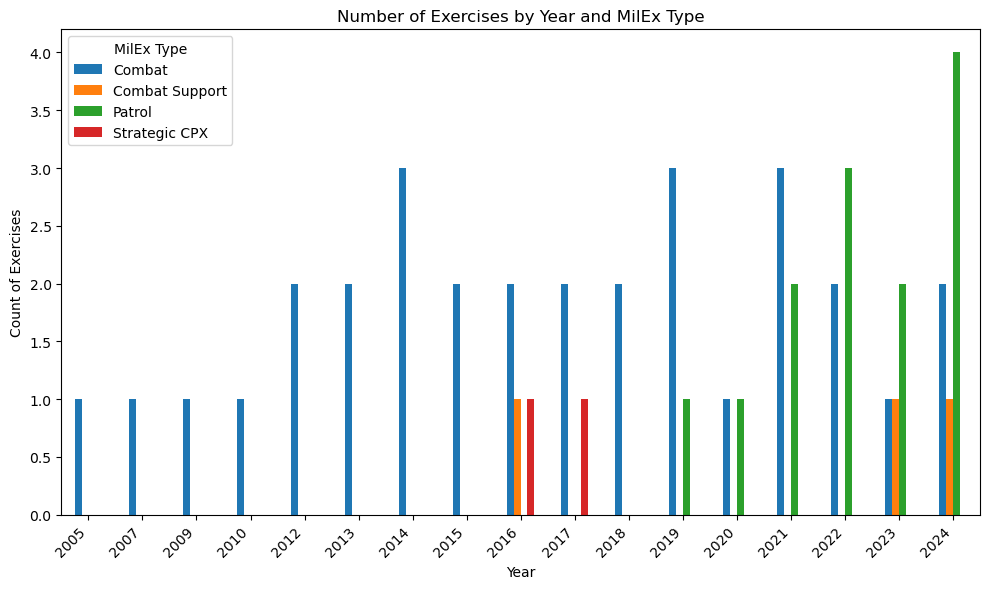

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'exercisesWithRF_keytypesonly' DataFrame is already created as in the notebook.
# If not, execute the code from the previous response to create it.

# Group by year and exercise type, then count
key_exercises_by_year_type = exercisesWithRF_keytypesonly.groupby(['Year', 'MilEx Type']).size().reset_index(name='Count')

# Pivot the table to have separate columns for each MilEx Type
pivot_table_key_exercisetype = key_exercises_by_year_type.pivot(index='Year', columns='MilEx Type', values='Count').fillna(0)


# Create the plot
pivot_table_key_exercisetype.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Number of Exercises by Year and MilEx Type')
plt.xlabel('Year')
plt.ylabel('Count of Exercises')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='MilEx Type')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [51]:
pivot_table_key_exercisetype

MilEx Type,Combat,Combat Support,Patrol,Strategic CPX
Year,,,,
2005,1.0,0.0,0.0,0.0
2007,1.0,0.0,0.0,0.0
2009,1.0,0.0,0.0,0.0
2010,1.0,0.0,0.0,0.0
2012,2.0,0.0,0.0,0.0
2013,2.0,0.0,0.0,0.0
2014,3.0,0.0,0.0,0.0
2015,2.0,0.0,0.0,0.0
2016,2.0,1.0,0.0,1.0


In [52]:
# create dataframe with only non-key categories


# Define the list of MilEx Types to keep
categories_to_keep2 = ['Anti-Piracy', 'Anti-Terrorism', 'Competition', 'MOOTW']

# Filter the DataFrame to keep only the desired categories
exercisesWithRF_nonkeytypesonly = exercisesWithRF[exercisesWithRF['MilEx Type'].isin(categories_to_keep2)]

# Display the updated DataFrame
exercisesWithRF_nonkeytypesonly.head()

,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,US CCMD AOR,Partner Country,Year,Month,Activity Type,Position,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Source,Comments,Unnamed: 26
596,Military Exercise,Central Asia,Europe and Central Asia,Member,CENTCOM,SCO,2006,3.0,Military Exercise - Multilateral,NaN,Anti-Terrorism,East-Antiterror-2006,Army,Special forces anti-terrorism exercise in Uzbe...,https://jamestown.org/program/uzbekistan-hosts...,NaN,NaN
790,Military Exercise,Central Asia,Europe and Central Asia,Member,CENTCOM,SCO,2007,5.0,Military Exercise - Multilateral,NaN,Anti-Terrorism,Issyuk-Kul Antiterror-2007,Army,anti-terrorism exercise in Kyrgyzstan; Countri...,de Haas Journal of Slavic Military Studies 29:...,NaN,NaN
862,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2007,9.0,Military Exercise - Bilateral,NaN,Anti-Terrorism,Cooperation 2007,PAP,Snow Leopard commando unit,https://www.jstor.org/stable/resrep11945.11?se...,NaN,NaN
1150,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2009,9.0,Military Exercise - Bilateral,NaN,Anti-Piracy,Peace Shield 2009,Navy,"Maritime manuever in Gulf of Aden, 18 Sept. 2009",https://sputniknews.com/military/2009091815616...,NaN,NaN
1151,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2009,9.0,Military Exercise - Bilateral,NaN,MOOTW,River/port Emergencies Exercises,PAP,“the first joint border blockading and control...,https://www.jstor.org/stable/pdf/resrep11945.1...,NaN,NaN


In [53]:
# @title Geographic Region vs Year

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(exercisesWithRF['Geographic Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(exercisesWithRF, x='Year', y='Geographic Region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/3561458131.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



Over time the location of these joint exercises has changed, moving away from a focus on Central Asia to include more activities in Russia, Southeast Asia, and further afield (in Africa and the Middle East).

### Exercises with Russia by Host

In [54]:
# who has led the multilateral exercises

exercisesWithRF['Partner Country'].unique()

array(['Russia', 'SCO', 'Indonesia', nan, 'ASEAN', 'South Africa', 'Iran'],
      dtype=object)

In [ ]:
# get unique years for Partner Country == SCO
print("SCO",exercisesWithRF[exercisesWithRF['Partner Country'] == 'SCO']['Year'].unique())
print("Russia", exercisesWithRF[exercisesWithRF['Partner Country'] == 'Russia']['Year'].unique())
print("Indonesia", exercisesWithRF[exercisesWithRF['Partner Country'] == 'Indonesia']['Year'].unique())
print("ASEAN", exercisesWithRF[exercisesWithRF['Partner Country'] == 'ASEAN']['Year'].unique())
print("South Africa", exercisesWithRF[exercisesWithRF['Partner Country'] == 'South Africa']['Year'].unique())
print("Iran", exercisesWithRF[exercisesWithRF['Partner Country'] == 'Iran']['Year'].unique())


SCO [2006 2007 2010 2012 2014 2015 2016 2018 2021]
Russia [2005 2007 2009 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022
 2023 2024]
Indonesia [2016 2023]
ASEAN [2019]
South Africa [2019 2023]
Iran [2022 2023 2024]


/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/782957991.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



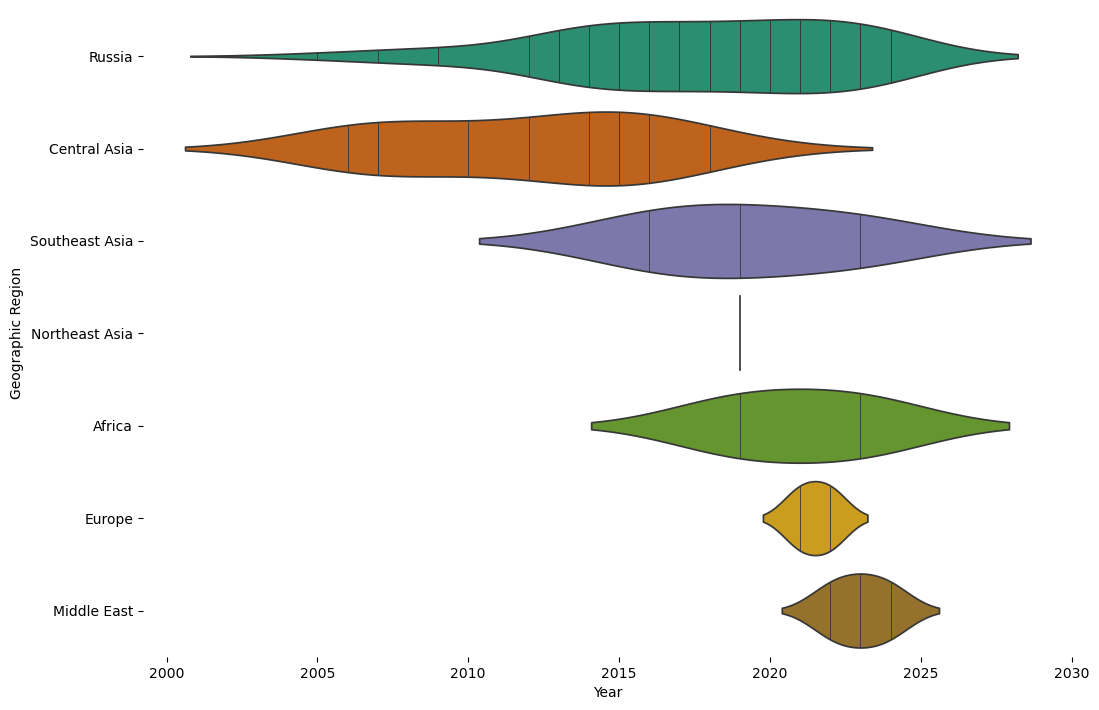

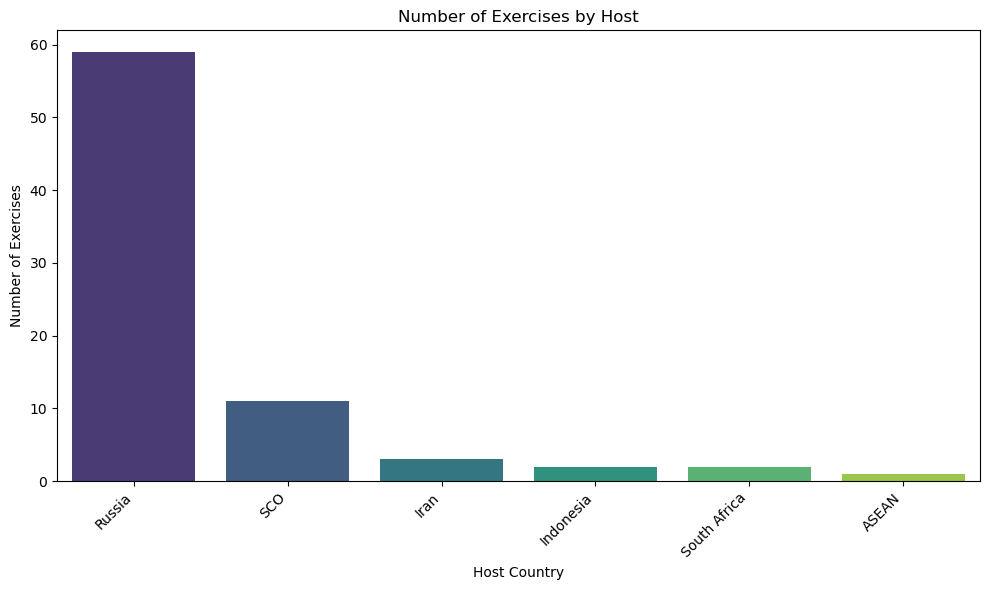

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming exercisesWithRF is already defined as a pandas DataFrame
# If not, load your data and create the DataFrame first.

# Filter out rows where 'Partner Country' is null
filtered_exercises = exercisesWithRF.dropna(subset=['Partner Country'])

# Group by 'Partner Country' and count the number of exercises for each country
country_counts = filtered_exercises['Partner Country'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")
plt.title('Number of Exercises by Host')
plt.ylabel('Number of Exercises')
plt.xlabel('Host Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
# Count the number of each host of military exercise
partner_counts = exercisesWithRF['Partner Country'].value_counts()

# Print the counts
print(partner_counts)

Partner Country
Russia          59
SCO             11
Iran             3
Indonesia        2
South Africa     2
ASEAN            1
Name: count, dtype: int64


In [57]:
import pandas as pd

# Group by 'Partner Country' and then aggregate 'Year' into a list
partner_years = exercisesWithRF.groupby('Partner Country')['Year'].apply(list).reset_index(name='Years')

# Print the resulting DataFrame
print(partner_years)

  Partner Country                                              Years
0           ASEAN                                             [2019]
1       Indonesia                                       [2016, 2023]
2            Iran                                 [2022, 2023, 2024]
3          Russia  [2005, 2007, 2009, 2009, 2009, 2012, 2013, 201...
4             SCO  [2006, 2007, 2007, 2010, 2012, 2014, 2015, 201...
5    South Africa                                       [2019, 2023]


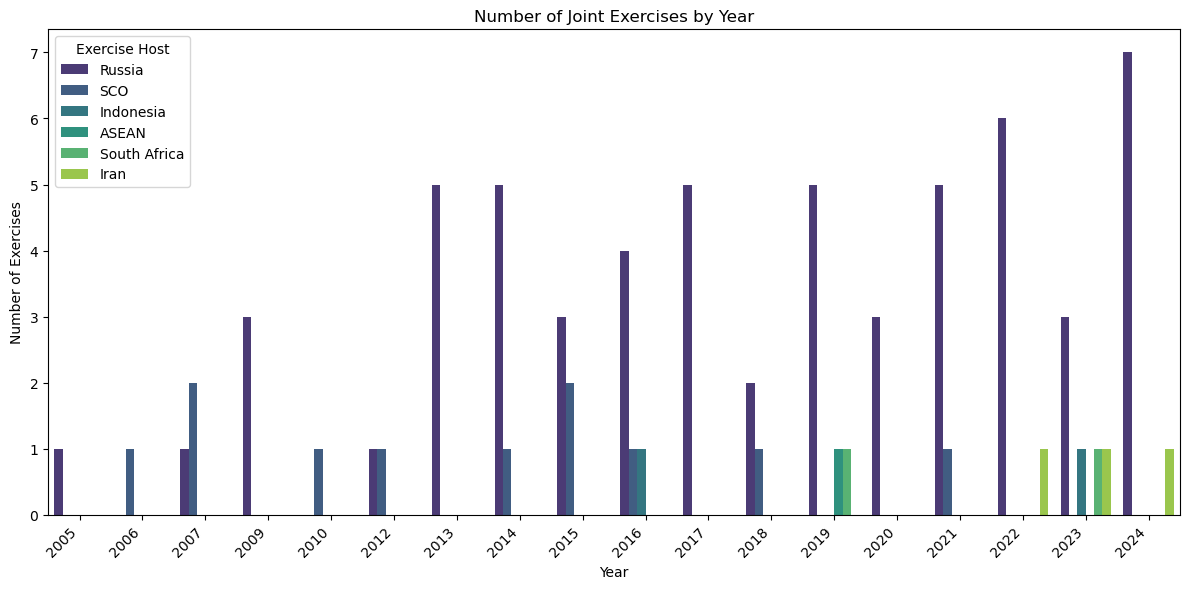

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming exercisesWithRF is already defined as a pandas DataFrame
# If not, load your data and create the DataFrame first.

# Filter out rows where 'Partner Country' is null
filtered_exercises = exercisesWithRF.dropna(subset=['Partner Country'])

# Group by 'Year' and 'Partner Country' and count the number of exercises
grouped_exercises = filtered_exercises.groupby(['Year', 'Partner Country']).size().reset_index(name='Count')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Count', hue='Partner Country', data=grouped_exercises, palette='viridis')
plt.title('Number of Joint Exercises by Year')
plt.xlabel('Year')
plt.ylabel('Number of Exercises')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Exercise Host')
plt.tight_layout()
plt.show()

In [59]:
import pandas as pd

# Filter for exercises where the 'Partner Country' is Russia
russia_exercises = exercisesWithRF[exercisesWithRF['Partner Country'] == 'Russia']

# Count the number of exercises per year
exercises_per_year = russia_exercises['Year'].value_counts().sort_index()

# Calculate the average number of exercises per year
average_exercises_per_year = exercises_per_year.mean()

# Print the average
print(f"The average number of exercises hosted by Russia per year is: {average_exercises_per_year:.2f}")

The average number of exercises hosted by Russia per year is: 3.69


In [60]:
import pandas as pd

# Filter for exercises where the 'Partner Country' is Russia
sco_exercises = exercisesWithRF[exercisesWithRF['Partner Country'] == 'SCO']

# Count the number of exercises per year
sco_exercises_per_year = sco_exercises['Year'].value_counts().sort_index()

# Calculate the average number of exercises per year
average_sco_exercises_per_year = sco_exercises_per_year.mean()

# Print the average
print(f"The average number of exercises hosted by the SCO per year is: {average_sco_exercises_per_year:.2f}")

The average number of exercises hosted by the SCO per year is: 1.22


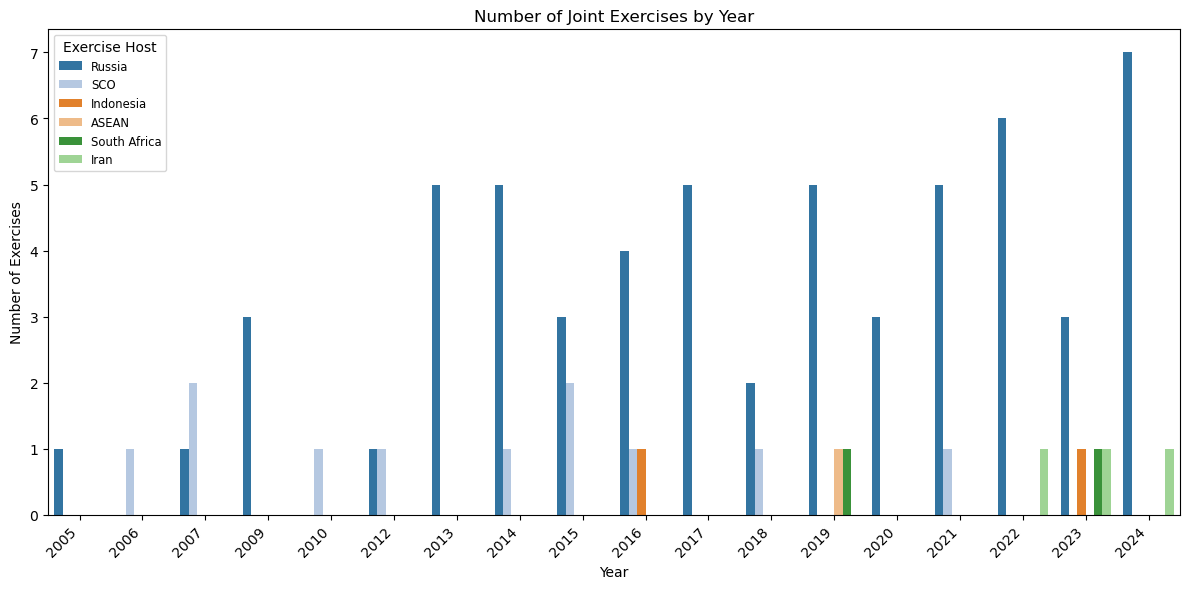

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming exercisesWithRF is already defined as a pandas DataFrame
# If not, load your data and create the DataFrame first.

# Filter out rows where 'Partner Country' is null
filtered_exercises = exercisesWithRF.dropna(subset=['Partner Country'])

# Group by 'Year' and 'Partner Country' and count the number of exercises
grouped_exercises = filtered_exercises.groupby(['Year', 'Partner Country']).size().reset_index(name='Count')

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Year', y='Count', hue='Partner Country', data=grouped_exercises, palette='tab20')
plt.title('Number of Joint Exercises by Year')
plt.xlabel('Year')
plt.ylabel('Number of Exercises')
plt.xticks(rotation=45, ha='right')

# Make legend smaller
plt.legend(title='Exercise Host', fontsize='small')

plt.tight_layout()
plt.show()

#### Average exercises per year 2005-2011 and 2012-2024


In [62]:
import pandas as pd

# Assuming 'exercisesWithRF' DataFrame is already defined

# Filter out rows where 'Partner Country' is null
filtered_partners = exercisesWithRF.dropna(subset=['Partner Country'])

# Group by 'Year' and 'Partner Country' and count the number of exercises
grouped_partners = filtered_partners.groupby(['Year', 'Partner Country']).size().reset_index(name='Count')


# Filter data for the two time periods
partners_2005_2011 = grouped_partners[(grouped_partners['Year'] >= 2005) & (grouped_partners['Year'] <= 2011)]
partners_2012_2024 = grouped_partners[(grouped_partners['Year'] >= 2012) & (grouped_partners['Year'] <= 2024)]

# Calculate the average for each partner for 2005-2011
part_average_2005_2011 = partners_2005_2011.groupby('Partner Country')['Count'].mean().reset_index()
part_average_2005_2011['Time Period'] = '2005-2011'

# Calculate the average for each partner for 2012-2024
part_average_2012_2024 = partners_2012_2024.groupby('Partner Country')['Count'].mean().reset_index()
part_average_2012_2024['Time Period'] = '2012-2024'

# Concatenate the two DataFrames
part_average_by_period = pd.concat([part_average_2005_2011, part_average_2012_2024])

# Print the results
print([part_average_by_period])

[  Partner Country     Count Time Period
0          Russia  1.666667   2005-2011
1             SCO  1.333333   2005-2011
0           ASEAN  1.000000   2012-2024
1       Indonesia  1.000000   2012-2024
2            Iran  1.000000   2012-2024
3          Russia  4.153846   2012-2024
4             SCO  1.166667   2012-2024
5    South Africa  1.000000   2012-2024]


In [63]:
import pandas as pd
from scipy import stats

# Load the data into a pandas DataFrame
data = pd.DataFrame({
    'Partner Country': ['Russia', 'SCO','Russia', 'SCO'],
    'Count': [1.666667, 1.333333, 3.769231, 1.166667],
    'Time Period': ['2005-2011', '2005-2011',  '2012-2024', '2012-2024']
})

# Separate data into two groups
data_2005_2011 = data[data['Time Period'] == '2005-2011']['Count']
data_2012_2024 = data[data['Time Period'] == '2012-2024']['Count']

# Conduct the t-test, assuming unequal variances
t_stat, p_val = stats.ttest_ind(data_2005_2011, data_2012_2024, equal_var=False)

# Output the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.3f}")

# Determine statistical significance
alpha = 0.05
if p_val < alpha:
    print("There is a statistically significant difference in the means of the two time periods.")
else:
    print("There is no statistically significant difference in the means of the two time periods.")

T-statistic: -0.74
P-value: 0.592
There is no statistically significant difference in the means of the two time periods.


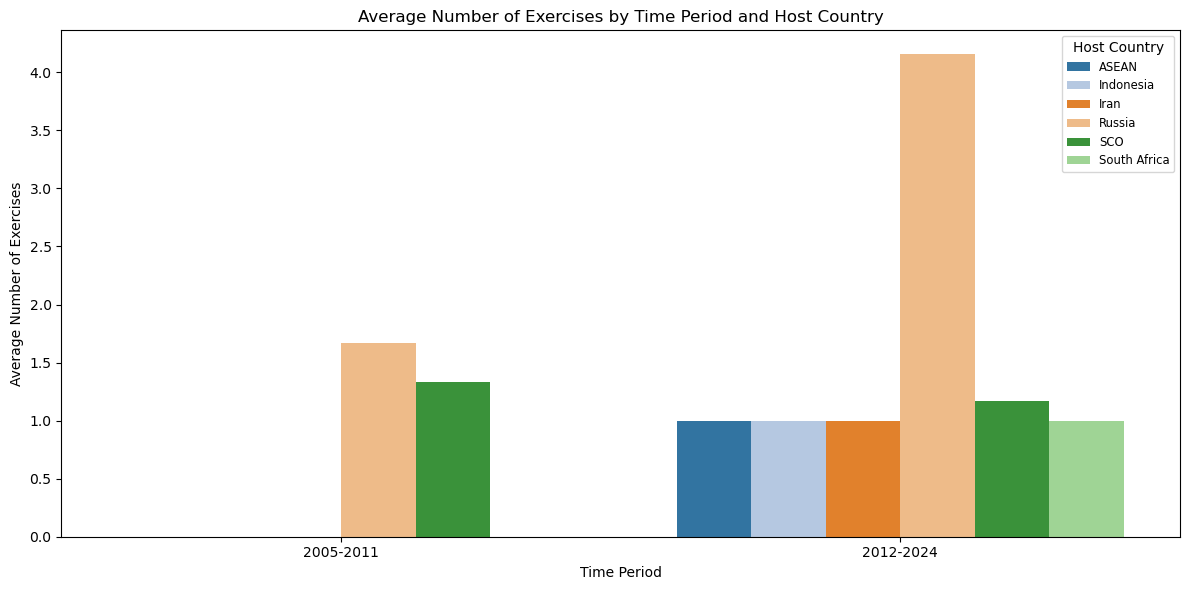

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'average_by_period' DataFrame is already created
# Ensure 'Partner Country' is treated as categorical (if needed)
part_average_by_period['Partner Country'] = part_average_by_period['Partner Country'].astype('category')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Time Period', y='Count', hue='Partner Country', data=part_average_by_period, palette='tab20')

plt.title('Average Number of Exercises by Time Period and Host Country')
plt.xlabel('Time Period')
plt.ylabel('Average Number of Exercises')
plt.legend(title='Host Country', fontsize='small')
plt.tight_layout()
plt.show()

#### Average exercises per year 2005-2013 and 2014-2024


In [65]:


# Filter data for the two time periods
partners_2005_2013 = grouped_partners[(grouped_partners['Year'] >= 2005) & (grouped_partners['Year'] <= 2013)]
partners_2014_2024 = grouped_partners[(grouped_partners['Year'] >= 2014) & (grouped_partners['Year'] <= 2024)]

# Calculate the average for each partner for 2005-2011
part_average_2005_2013 = partners_2005_2013.groupby('Partner Country')['Count'].mean().reset_index()
part_average_2005_2013['Time Period'] = '2005-2013'

# Calculate the average for each partner for 2012-2024
part_average_2014_2024 = partners_2014_2024.groupby('Partner Country')['Count'].mean().reset_index()
part_average_2014_2024['Time Period'] = '2014-2024'

# Concatenate the two DataFrames
part_average_by_period2 = pd.concat([part_average_2005_2013, part_average_2014_2024])

# Print the results
print([part_average_by_period2])

[  Partner Country     Count Time Period
0          Russia  2.200000   2005-2013
1             SCO  1.250000   2005-2013
0           ASEAN  1.000000   2014-2024
1       Indonesia  1.000000   2014-2024
2            Iran  1.000000   2014-2024
3          Russia  4.363636   2014-2024
4             SCO  1.200000   2014-2024
5    South Africa  1.000000   2014-2024]


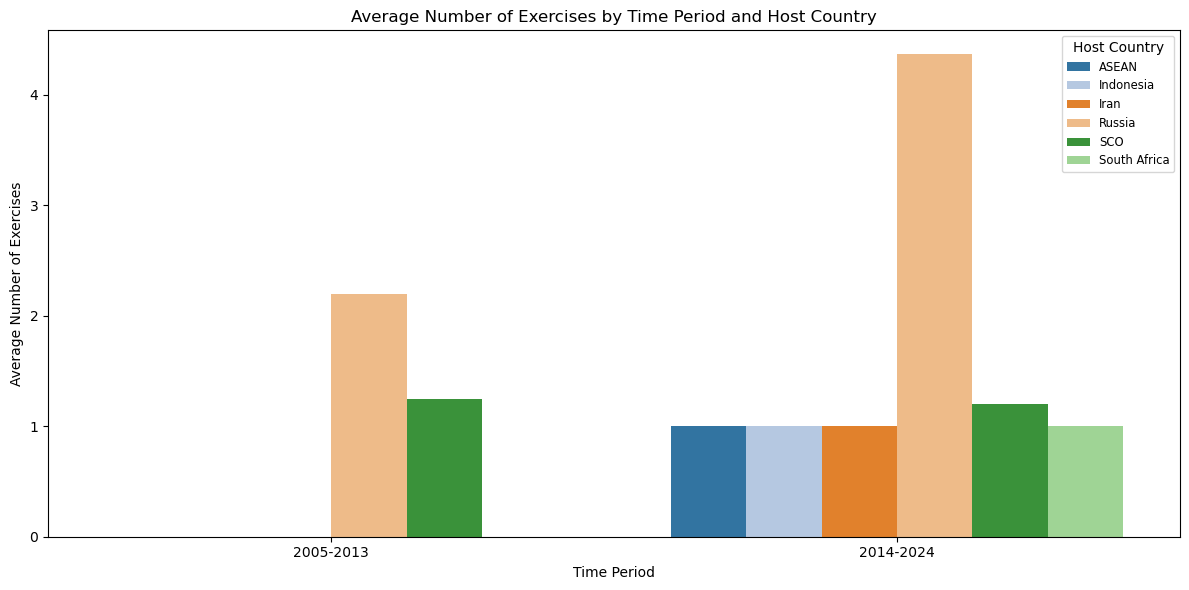

In [66]:

# Assuming 'average_by_period' DataFrame is already created
# Ensure 'Partner Country' is treated as categorical (if needed)
part_average_by_period2['Partner Country'] = part_average_by_period2['Partner Country'].astype('category')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Time Period', y='Count', hue='Partner Country', data=part_average_by_period2, palette='tab20')

plt.title('Average Number of Exercises by Time Period and Host Country')
plt.xlabel('Time Period')
plt.ylabel('Average Number of Exercises')
plt.legend(title='Host Country', fontsize='small')
plt.tight_layout()
plt.show()

#### Details on non-Russia/SCO host exercises

In [67]:
rows_with_ASEAN_partner = exercisesWithRF[exercisesWithRF['Partner Country'] == 'ASEAN']
rows_with_ASEAN_partner

,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,US CCMD AOR,Partner Country,Year,Month,Activity Type,Position,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Source,Comments,Unnamed: 26
2933,Military Exercise,Southeast Asia,Asia,Strategic Partnership [战略伙伴关系] for Peace and P...,INDOPACOM,ASEAN,2019,11.0,Military Exercise - Multilateral,NaN,Anti-Terrorism,ADMM Plus Joint Counter-terrorism drill,Army,Southern Theater Command; Other countries: 10 ...,http://www.globaltimes.cn/content/1169981.shtml,"Added source, updated drill details, recategor...",NaN


In [68]:
rows_with_Iran = exercisesWithRF[exercisesWithRF['Partner Country'] == 'Iran']
rows_with_Iran

,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,US CCMD AOR,Partner Country,Year,Month,Activity Type,Position,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Source,Comments,Unnamed: 26
3057,Military Exercise,Middle East,West Asia and Africa,Comprehensive Strategic Partnership [全面战略伙伴关系],CENTCOM,Iran,2022,1.0,Military Exercise - Multilateral,NaN,Anti-Piracy,Marine Security Belt 2022,Navy,"Urumqi guided-missile destroyer , supply ship ...",http://eng.mod.gov.cn/news/2022-01/20/content_...,Not enough combat related acty to classify as ...,NaN
3119,Military Exercise,Middle East,West Asia and Africa,Comprehensive Strategic Partnership [全面战略伙伴关系],CENTCOM,Iran,2023,3.0,Military Exercise - Multilateral,NaN,Combat Support,Security Belt 2023,Navy,with Russia in Gulf of Oman; dispatched guided...,hxxp://eng.chinamil.com.cn/CHINA_209163/TopSto...,NaN,NaN
3228,Military Exercise,Middle East,West Asia and Africa,Comprehensive Strategic Partnership [全面战略伙伴关系],CENTCOM,Iran,2024,3.0,Military Exercise - Multilateral,NaN,Combat Support,Security Belt 2024,Navy,with Russia and Iran in Gulf of Oman; The Chin...,https://www.globaltimes.cn/page/202403/1308701...,NaN,NaN


In [69]:
rows_with_SouthAfrica = exercisesWithRF[exercisesWithRF['Partner Country'] == 'South Africa']
rows_with_SouthAfrica

,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,US CCMD AOR,Partner Country,Year,Month,Activity Type,Position,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Source,Comments,Unnamed: 26
2947,Military Exercise,Africa,West Asia and Africa,Comprehensive Strategic Partnership [全面战略伙伴关系],AFRICOM,South Africa,2019,11.0,Military Exercise - Multilateral,NaN,Combat,Mosi,Navy,first Russia-China-South Africa TL exercise; g...,https://www.navyrecognition.com/index.php/news...,TL exercise CODED as South Africa because of t...,NaN
3116,Military Exercise,Africa,West Asia and Africa,Comprehensive Strategic Partnership [全面战略伙伴关系],AFRICOM,South Africa,2023,2.0,Military Exercise - Multilateral,NaN,Anti-Terrorism,Unnamed,Navy,Second Russia-China-South Africa exercise; 42n...,http://eng.mod.gov.cn/xb/News_213114/TopStorie...,NaN,NaN


In [70]:
rows_with_nan_partner = exercisesWithRF[exercisesWithRF['Partner Country'].isna()]
rows_with_nan_partner


,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,US CCMD AOR,Partner Country,Year,Month,Activity Type,Position,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Source,Comments,Unnamed: 26
2825,Military Exercise,Northeast Asia,Asia,NaN,INDOPACOM,NaN,2019,4.0,Military Exercise - Multilateral,NaN,MOOTW,70th Anniversary of PLA Navy Fleet Review,Navy,"Naval Parade including Russia, Thailand, Vietn...",http://www.81.cn/jfjbmap/content/2019-04/26/co...,"Added source, added country participants; ; ch...",NaN


### Exercises by Geographic Region

In [71]:
geo_counts = exercisesWithRF['Geographic Region'].value_counts()
geo_counts

Geographic Region
Russia            58
Central Asia      10
Southeast Asia     3
Middle East        3
Africa             2
Europe             2
Northeast Asia     1
Name: count, dtype: int64

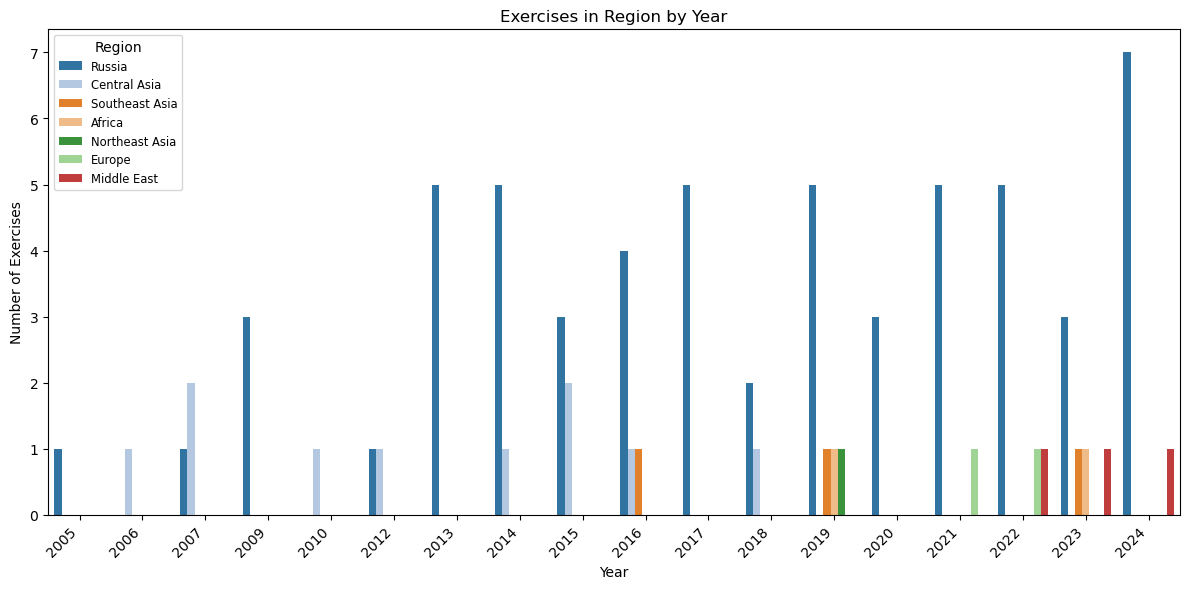

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming exercisesWithRF is already defined as a pandas DataFrame
# If not, load your data and create the DataFrame first.

# Filter out rows where 'Partner Country' is null
filtered_regions = exercisesWithRF.dropna(subset=['Geographic Region'])

# Group by 'Year' and 'Partner Country' and count the number of exercises
grouped_regions = filtered_regions.groupby(['Year', 'Geographic Region']).size().reset_index(name='Count')

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Year', y='Count', hue='Geographic Region', data=grouped_regions, palette='tab20')
plt.title('Exercises in Region by Year')
plt.xlabel('Year')
plt.ylabel('Number of Exercises')
plt.xticks(rotation=45, ha='right')

# Make legend smaller
plt.legend(title='Region', fontsize='small')

plt.tight_layout()
plt.show()

In [73]:
import pandas as pd

# Assuming 'grouped_regions' DataFrame is already created

# Pivot the table to have regions as columns
region_counts_pivot = grouped_regions.pivot_table(
    index='Year',
    columns='Geographic Region',
    values='Count',
    fill_value=0  # Fill missing values with 0
).reset_index()

# Print the pivoted table
region_counts_pivot

Geographic Region,Year,Africa,Central Asia,Europe,Middle East,Northeast Asia,Russia,Southeast Asia
0,2005,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2006,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2007,0.0,2.0,0.0,0.0,0.0,1.0,0.0
3,2009,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,2010,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,2012,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,2013,0.0,0.0,0.0,0.0,0.0,5.0,0.0
7,2014,0.0,1.0,0.0,0.0,0.0,5.0,0.0
8,2015,0.0,2.0,0.0,0.0,0.0,3.0,0.0
9,2016,0.0,1.0,0.0,0.0,0.0,4.0,1.0


#### Average exercises per year 2005-2011 and 2012-2024

In [74]:
import pandas as pd

# Assuming 'grouped_regions' DataFrame is already created

# Filter data for the two time periods
regions_2005_2011 = grouped_regions[(grouped_regions['Year'] >= 2005) & (grouped_regions['Year'] <= 2011)]
regions_2012_2024 = grouped_regions[(grouped_regions['Year'] >= 2012) & (grouped_regions['Year'] <= 2024)]

# Calculate the average for each region for 2005-2011
reg_average_2005_2011 = regions_2005_2011.groupby('Geographic Region')['Count'].mean().reset_index()
reg_average_2005_2011['Time Period'] = '2005-2011'

# Calculate the average for each region for 2012-2024
reg_average_2012_2024 = regions_2012_2024.groupby('Geographic Region')['Count'].mean().reset_index()
reg_average_2012_2024['Time Period'] = '2012-2024'

# Concatenate the two DataFrames
reg_average_by_period = pd.concat([reg_average_2005_2011, reg_average_2012_2024])

# Print the results
print(reg_average_by_period)

  Geographic Region     Count Time Period
0      Central Asia  1.333333   2005-2011
1            Russia  1.666667   2005-2011
0            Africa  1.000000   2012-2024
1      Central Asia  1.200000   2012-2024
2            Europe  1.000000   2012-2024
3       Middle East  1.000000   2012-2024
4    Northeast Asia  1.000000   2012-2024
5            Russia  4.076923   2012-2024
6    Southeast Asia  1.000000   2012-2024


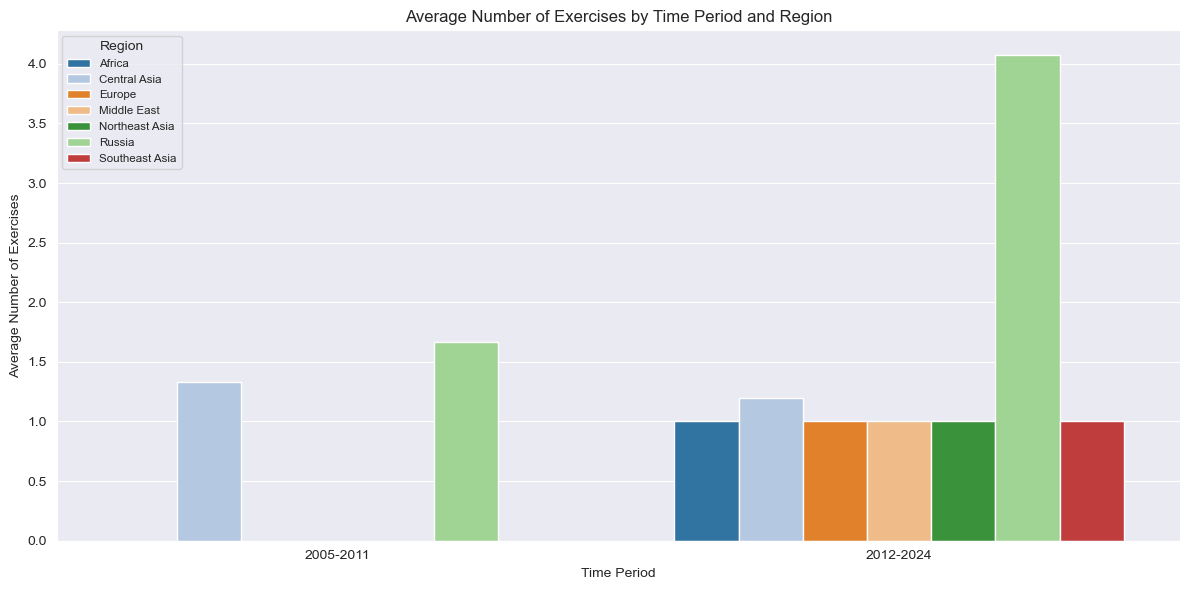

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'average_by_period' DataFrame is already created
# Ensure 'Partner Country' is treated as categorical (if needed)
reg_average_by_period['Geographic Region'] = reg_average_by_period['Geographic Region'].astype('category')

# Set the style with the desired background and gridlines (e.g., 'whitegrid', 'darkgrid')
sns.set_style("darkgrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Time Period', y='Count', hue='Geographic Region', data=reg_average_by_period, palette='tab20')

plt.title('Average Number of Exercises by Time Period and Region')
plt.xlabel('Time Period')
plt.ylabel('Average Number of Exercises')
plt.legend(title='Region', fontsize='small')
plt.tight_layout()
plt.show()

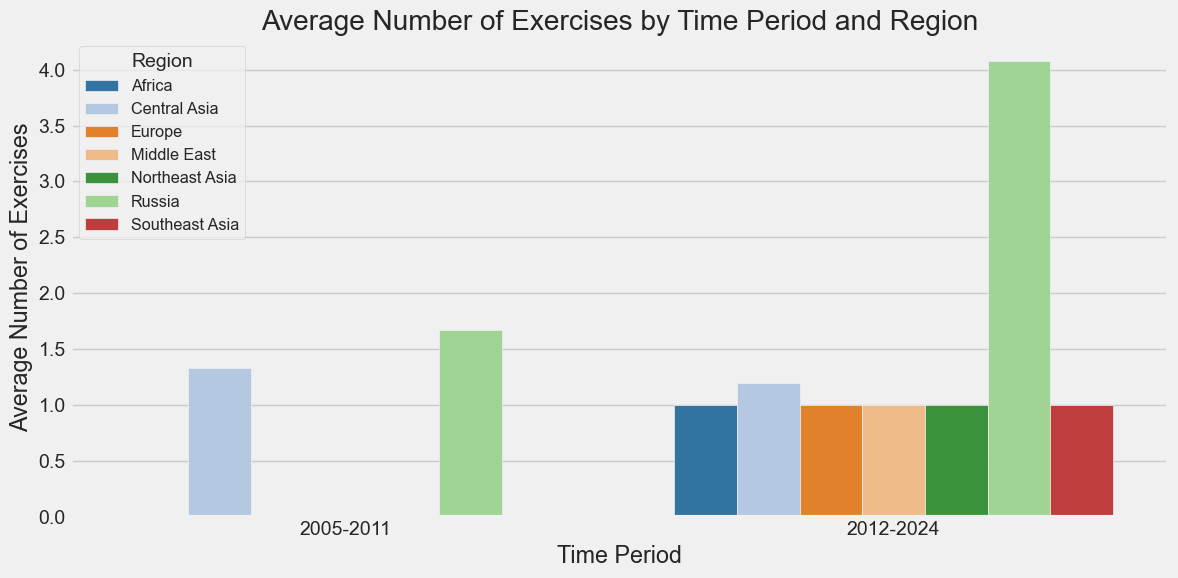

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Matplotlib's fivethirtyeight style
plt.style.use('fivethirtyeight')

# Create a Seaborn plot (example using average_by_period DataFrame)
plt.figure(figsize=(12, 6))
sns.barplot(x='Time Period', y='Count', hue='Geographic Region', data=reg_average_by_period, palette='tab20')
plt.title('Average Number of Exercises by Time Period and Region')
plt.xlabel('Time Period')
plt.ylabel('Average Number of Exercises')
plt.legend(title='Region', fontsize='small')
plt.tight_layout()
plt.show()

#### Average exercises per year 2005-2013 and 2014-2024


In [77]:
import pandas as pd

# Assuming 'grouped_regions' DataFrame is already created

# Filter data for the two time periods
regions_2005_2013 = grouped_regions[(grouped_regions['Year'] >= 2005) & (grouped_regions['Year'] <= 2013)]
regions_2014_2024 = grouped_regions[(grouped_regions['Year'] >= 2014) & (grouped_regions['Year'] <= 2024)]

# Calculate the average for each region for 2005-2013
reg_average_2005_2013 = regions_2005_2013.groupby('Geographic Region')['Count'].mean().reset_index()
reg_average_2005_2013['Time Period'] = '2005-2013'

# Calculate the average for each region for 2013-2024
reg_average_2014_2024 = regions_2014_2024.groupby('Geographic Region')['Count'].mean().reset_index()
reg_average_2014_2024['Time Period'] = '2013-2024'

# Concatenate the two DataFrames
reg_average_by_period2 = pd.concat([reg_average_2005_2013, reg_average_2014_2024])

# Print the results
print(reg_average_by_period2)

  Geographic Region     Count Time Period
0      Central Asia  1.250000   2005-2013
1            Russia  2.200000   2005-2013
0            Africa  1.000000   2013-2024
1      Central Asia  1.250000   2013-2024
2            Europe  1.000000   2013-2024
3       Middle East  1.000000   2013-2024
4    Northeast Asia  1.000000   2013-2024
5            Russia  4.272727   2013-2024
6    Southeast Asia  1.000000   2013-2024


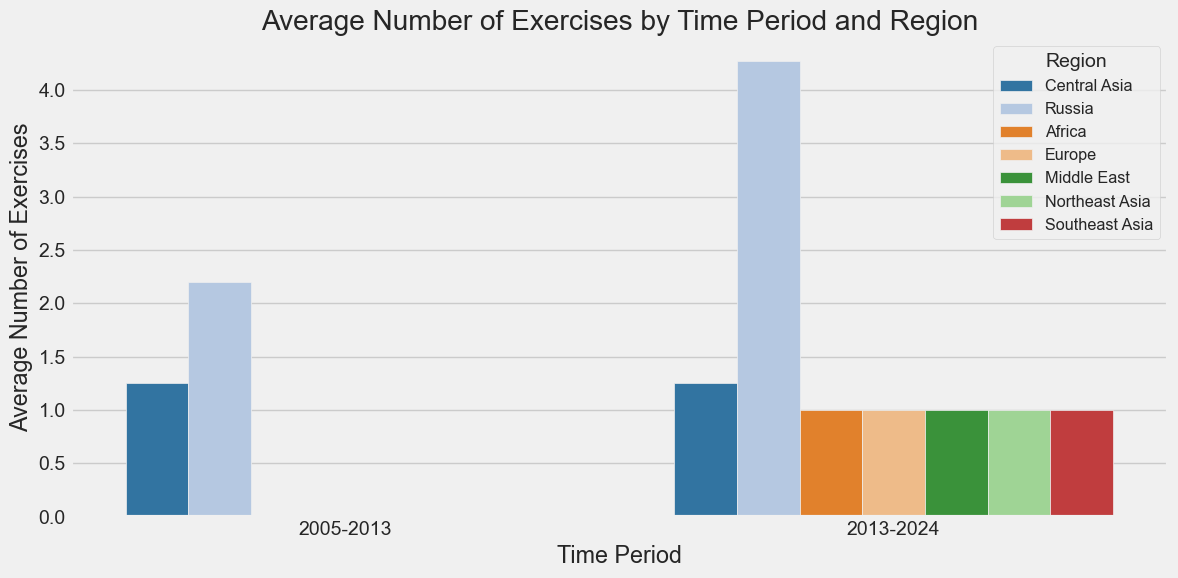

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Matplotlib's fivethirtyeight style
plt.style.use('fivethirtyeight')

# Create a Seaborn plot (example using average_by_period DataFrame)
plt.figure(figsize=(12, 6))
sns.barplot(x='Time Period', y='Count', hue='Geographic Region', data=reg_average_by_period2, palette='tab20')
plt.title('Average Number of Exercises by Time Period and Region')
plt.xlabel('Time Period')
plt.ylabel('Average Number of Exercises')
plt.legend(title='Region', fontsize='small')
plt.tight_layout()
plt.show()

## All Activities with Partner Country == Russia

In [79]:
# filter so includes only "Partner Country" == "Russia"
russia_diplomacy = chinese_military_diplomacy[chinese_military_diplomacy['Partner Country'] == 'Russia']
russia_diplomacy.head()

,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,U.S. Collective Defense Status,US CCMD AOR,Partner Country,Year,Month,Activity Type,...,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Port Call Voyage Identifier,Associated Fleet,Port Call Details,Source,Comments,Unnamed: 26
10,Naval Port Call,Russia,Europe and Central Asia,No Specific Relationship,NaN,EUCOM,Russia,1994,5.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1994-05 DD166 Zhuhai,All,"Dajiang Sub Tender Changxingdao 121, Luda-II d...",NaN,NaN,NaN
12,Naval Port Call,Russia,Europe and Central Asia,No Specific Relationship,NaN,EUCOM,Russia,1995,8.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1995-08 FFG541 Huaibei,East Sea Fleet,Jiangwei frigate Huaibei 541,NaN,NaN,NaN
14,Naval Port Call,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,1996,7.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1996-07 DD112 Harbin,North Sea Fleet,Luhu destroyer Harbin 112,NaN,NaN,NaN
88,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2002,6.0,BL - Hosted,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CPP20020601000085,NaN,NaN
102,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2002,7.0,BL - Hosted,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JPP20020717000049,NaN,NaN


In [80]:
russia_diplomacy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 10 to 3371
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Activity Category               164 non-null    object 
 1   Geographic Region               164 non-null    object 
 2   Region (MND FAO)                164 non-null    object 
 3   PRC Relationship Category       164 non-null    object 
 4   U.S. Collective Defense Status  0 non-null      object 
 5   US CCMD AOR                     164 non-null    object 
 6   Partner Country                 164 non-null    object 
 7   Year                            164 non-null    int64  
 8   Month                           164 non-null    float64
 9   Activity Type                   164 non-null    object 
 10  Person                          97 non-null     object 
 11  Trip Count - Abroad             0 non-null      float64
 12  Position                        99 non-

In [81]:
# list types of "Activity Category"
russia_diplomacy['Activity Category'].unique()

array(['Naval Port Call', 'Senior Level Visit', 'Military Exercise'],
      dtype=object)

In [82]:
# sort by year and by 'Activity Category'
russia_diplomacy.sort_values(by=['Year', 'Activity Category'], inplace=True)
russia_diplomacy.head()

/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/361652531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,U.S. Collective Defense Status,US CCMD AOR,Partner Country,Year,Month,Activity Type,...,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Port Call Voyage Identifier,Associated Fleet,Port Call Details,Source,Comments,Unnamed: 26
10,Naval Port Call,Russia,Europe and Central Asia,No Specific Relationship,NaN,EUCOM,Russia,1994,5.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1994-05 DD166 Zhuhai,All,"Dajiang Sub Tender Changxingdao 121, Luda-II d...",NaN,NaN,NaN
12,Naval Port Call,Russia,Europe and Central Asia,No Specific Relationship,NaN,EUCOM,Russia,1995,8.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1995-08 FFG541 Huaibei,East Sea Fleet,Jiangwei frigate Huaibei 541,NaN,NaN,NaN
14,Naval Port Call,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,1996,7.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1996-07 DD112 Harbin,North Sea Fleet,Luhu destroyer Harbin 112,NaN,NaN,NaN
88,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2002,6.0,BL - Hosted,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CPP20020601000085,NaN,NaN
102,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2002,7.0,BL - Hosted,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JPP20020717000049,NaN,NaN


In [83]:
# plot number of activities by year
russia_diplomacy['Year'].value_counts().sort_index()


Year
1994     1
1995     1
1996     1
2002     3
2003     5
2004     6
2005     6
2006     4
2007     5
2008     2
2009     7
2010     3
2011     5
2012     4
2013     9
2014     8
2015    10
2016     9
2017     8
2018    11
2019    11
2020     5
2021     9
2022     8
2023    10
2024    13
Name: count, dtype: int64

#### Number of Joint Military Activities per Year

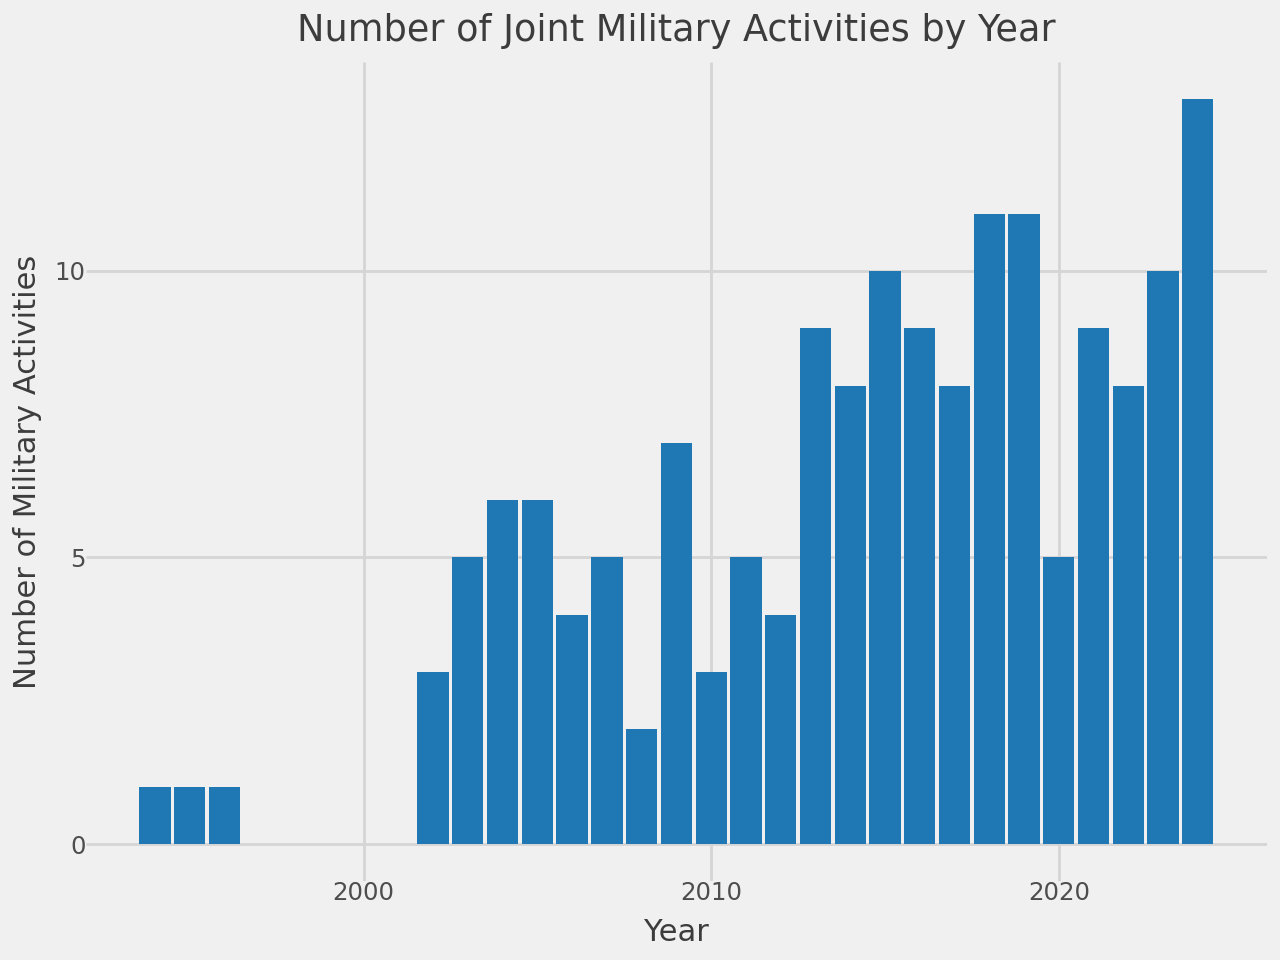

In [84]:
# Plot total joint activities by year
(
    ggplot(russia_diplomacy, aes(x='Year'))
    + geom_bar(fill="#1f78b4")
    + theme_set(theme_538())
    + labs(title="Number of Joint Military Activities by Year", x="Year", y="Number of Military Activities")
)



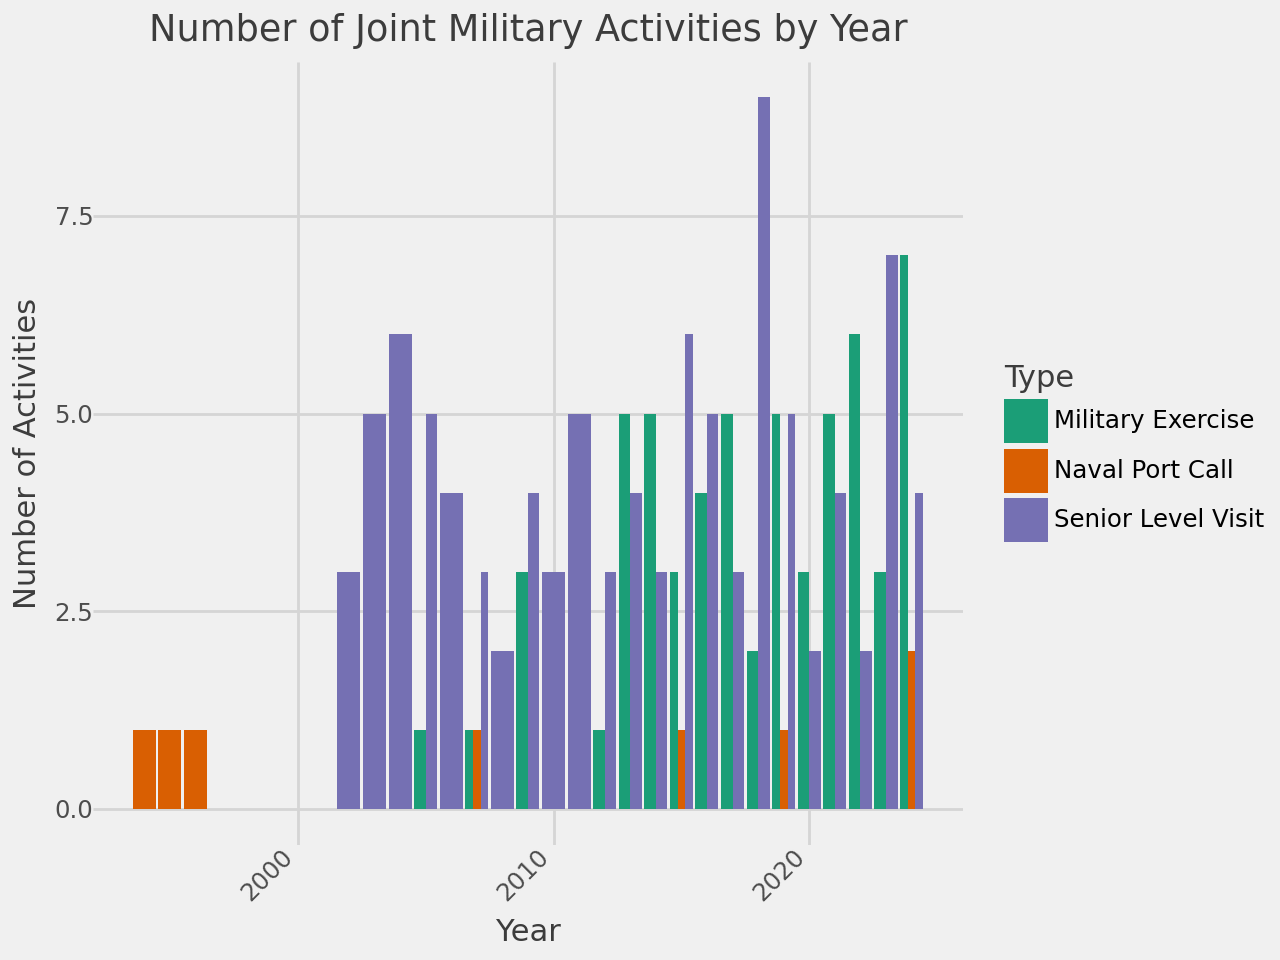

In [85]:
# plot by year and by type of activity


(
    ggplot(russia_diplomacy, aes(x='Year', fill='Activity Category'))
    + geom_bar(position='dodge')
    + theme_set(theme_538())
    + scale_fill_manual(
        values=["#1b9e77", "#d95f02", "#7570b3"],  # Example custom colors
        name="Type"                    # Legend title
    )
    + labs(
        title="Number of Joint Military Activities by Year",
        x="Year",
        y="Number of Activities"
    )
    + theme(
        axis_text_x=element_text(rotation=45, hjust=1)
    )
)


In [86]:
# Plot just the "Activity Category" == "Military Exercise" by year
military_exercise = russia_diplomacy[russia_diplomacy['Activity Category'] == 'Military Exercise']
military_exercise.head()


,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,U.S. Collective Defense Status,US CCMD AOR,Partner Country,Year,Month,Activity Type,...,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Port Call Voyage Identifier,Associated Fleet,Port Call Details,Source,Comments,Unnamed: 26
514,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2005,8.0,Military Exercise - Bilateral,...,Combat,Peace Mission 2005,Joint,"Army, Navy, Air Force, SOF; nominal anti-terro...",NaN,NaN,NaN,Defense White Paper Appendix,"Under SCO auspices, but coded as Russia becaus...",NaN
862,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2007,9.0,Military Exercise - Bilateral,...,Anti-terrorism,Cooperation 2007,PAP,Snow Leopard commando unit,NaN,NaN,NaN,https://www.jstor.org/stable/resrep11945.11?se...,NaN,NaN
1123,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2009,7.0,Military Exercise - Bilateral,...,Combat,Peace Mission 2009,Joint,"Army, Navy, Air Force, SOF; anti-terrorism; Pa...",NaN,NaN,NaN,Defense White Paper Appendix,"Under SCO auspices, but coded as Russia becaus...",NaN
1150,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2009,9.0,Military Exercise - Bilateral,...,Anti-piracy,Peace Shield 2009,Navy,"Maritime manuever in Gulf of Aden, 18 Sept. 2009",NaN,NaN,NaN,https://sputniknews.com/military/2009091815616...,NaN,NaN
1151,Military Exercise,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2009,9.0,Military Exercise - Bilateral,...,MOOTW,River/port Emergencies Exercises,PAP,“the first joint border blockading and control...,NaN,NaN,NaN,https://www.jstor.org/stable/pdf/resrep11945.1...,NaN,NaN


In [87]:
military_exercise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 514 to 3371
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Activity Category               59 non-null     object 
 1   Geographic Region               59 non-null     object 
 2   Region (MND FAO)                59 non-null     object 
 3   PRC Relationship Category       59 non-null     object 
 4   U.S. Collective Defense Status  0 non-null      object 
 5   US CCMD AOR                     59 non-null     object 
 6   Partner Country                 59 non-null     object 
 7   Year                            59 non-null     int64  
 8   Month                           59 non-null     float64
 9   Activity Type                   59 non-null     object 
 10  Person                          0 non-null      object 
 11  Trip Count - Abroad             0 non-null      float64
 12  Position                        2 non-n

In [88]:
# Military exercises led by Russia
military_exercise['Activity Type'].unique()

array(['Military Exercise - Bilateral',
       'Military Exercise - Multilateral'], dtype=object)

In [89]:
# Military exercises Russia participated in or led
exercisesWithRF['Activity Type'].unique()

array(['Military Exercise - Bilateral',
       'Military Exercise - Multilateral'], dtype=object)

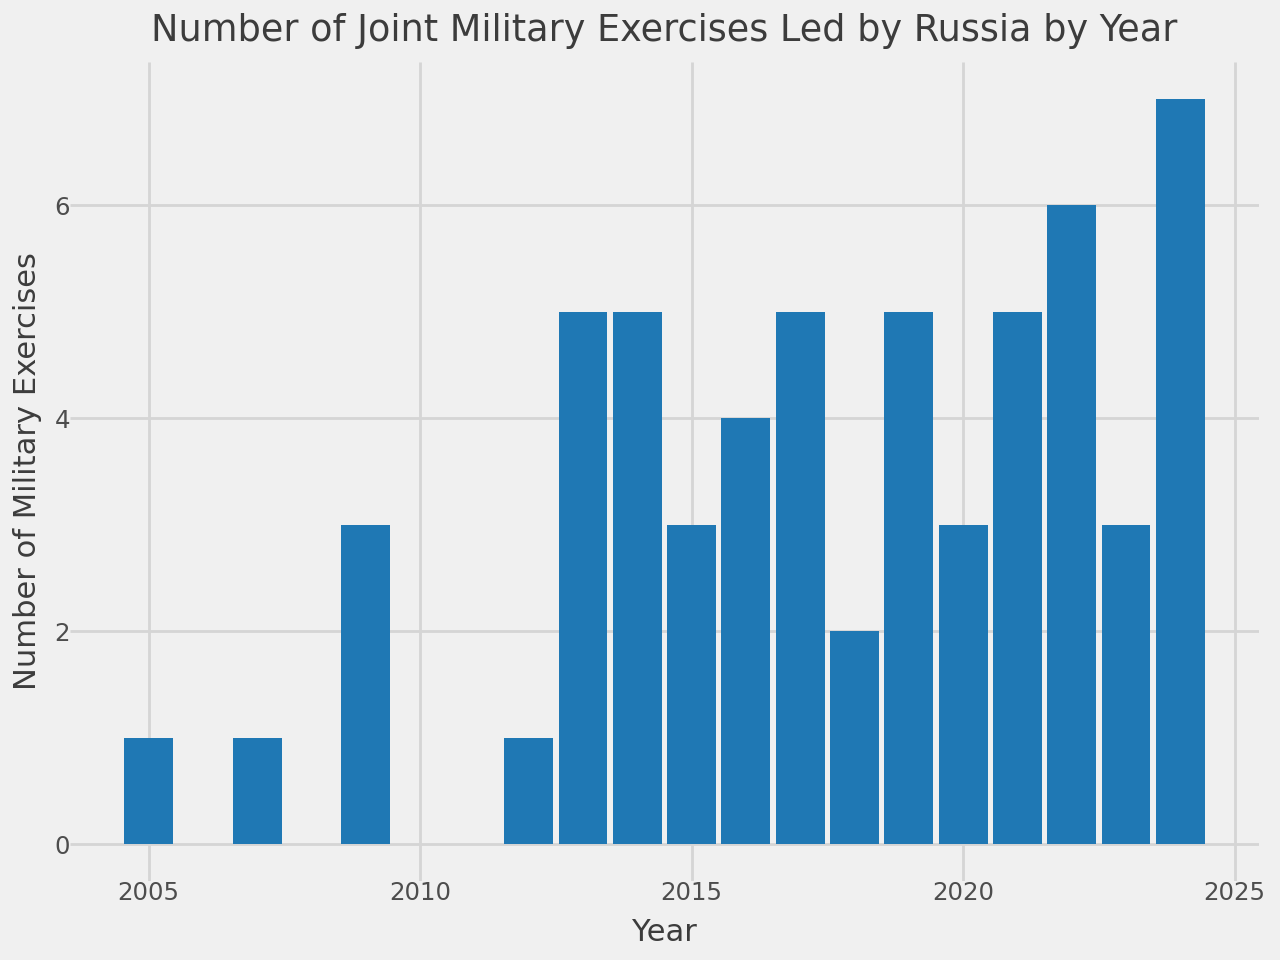

In [90]:
# Plot total joint activities led by Russia by year
(
    ggplot(military_exercise, aes(x='Year'))
    + geom_bar(fill="#1f78b4")
    + theme_set(theme_538())
    + labs(title="Number of Joint Military Exercises Led by Russia by Year", x="Year", y="Number of Military Exercises")
)


In [91]:
exercisesWithRF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 514 to 3371
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Activity Category          79 non-null     object 
 1   Geographic Region          79 non-null     object 
 2   Region (MND FAO)           79 non-null     object 
 3   PRC Relationship Category  78 non-null     object 
 4   US CCMD AOR                79 non-null     object 
 5   Partner Country            78 non-null     object 
 6   Year                       79 non-null     int64  
 7   Month                      79 non-null     float64
 8   Activity Type              79 non-null     object 
 9   Position                   2 non-null      object 
 10  MilEx Type                 79 non-null     object 
 11  MilEx Name                 74 non-null     object 
 12  MilEx Service              79 non-null     object 
 13  MilEx Details              79 non-null     object 
 1

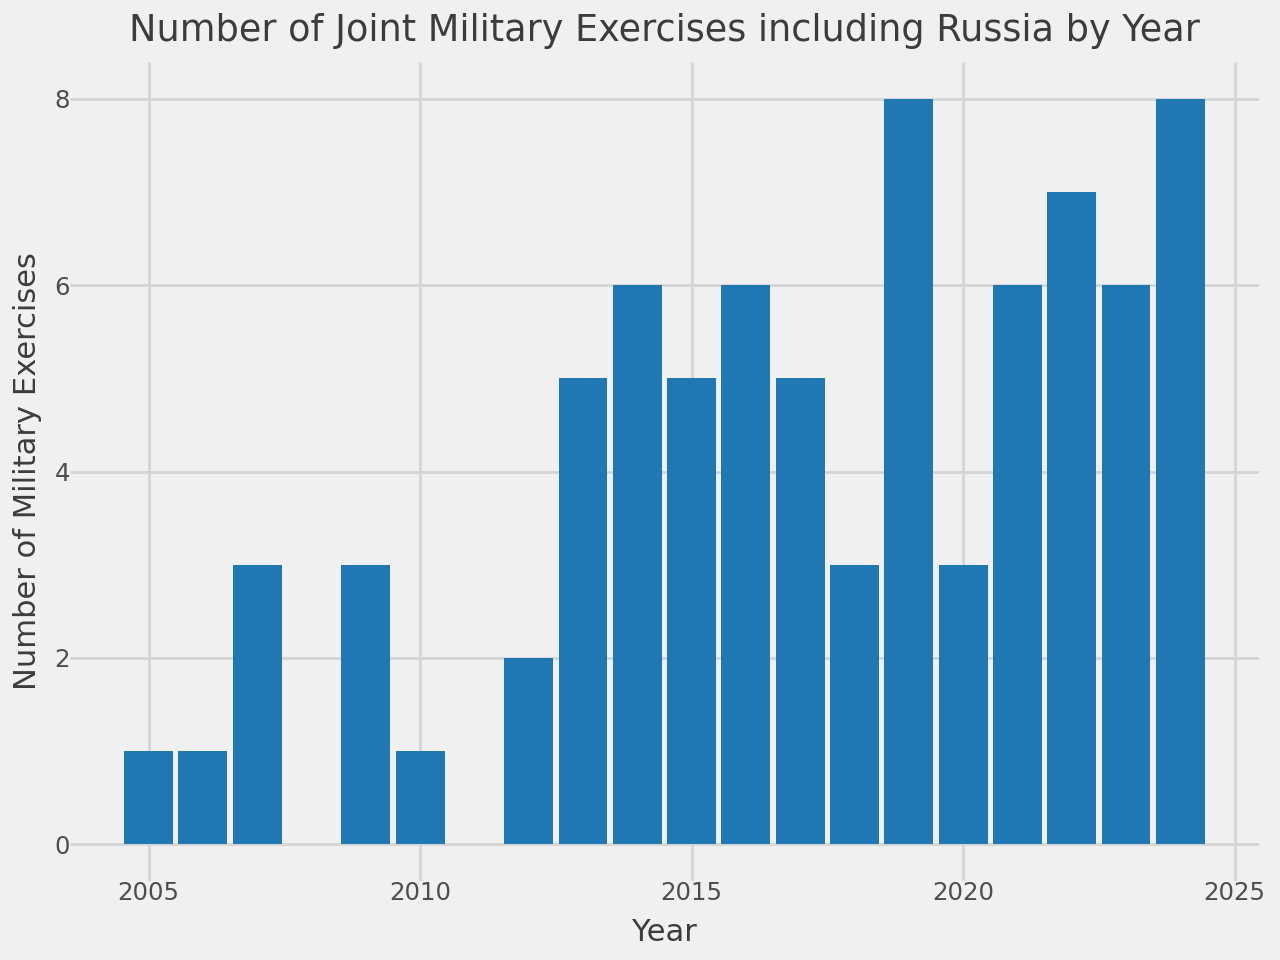

In [92]:
# Plot total joint activities by year
(
    ggplot(exercisesWithRF, aes(x='Year'))
    + geom_bar(fill="#1f78b4")
    + theme_set(theme_538())
    + labs(title="Number of Joint Military Exercises including Russia by Year", x="Year", y="Number of Military Exercises")
)


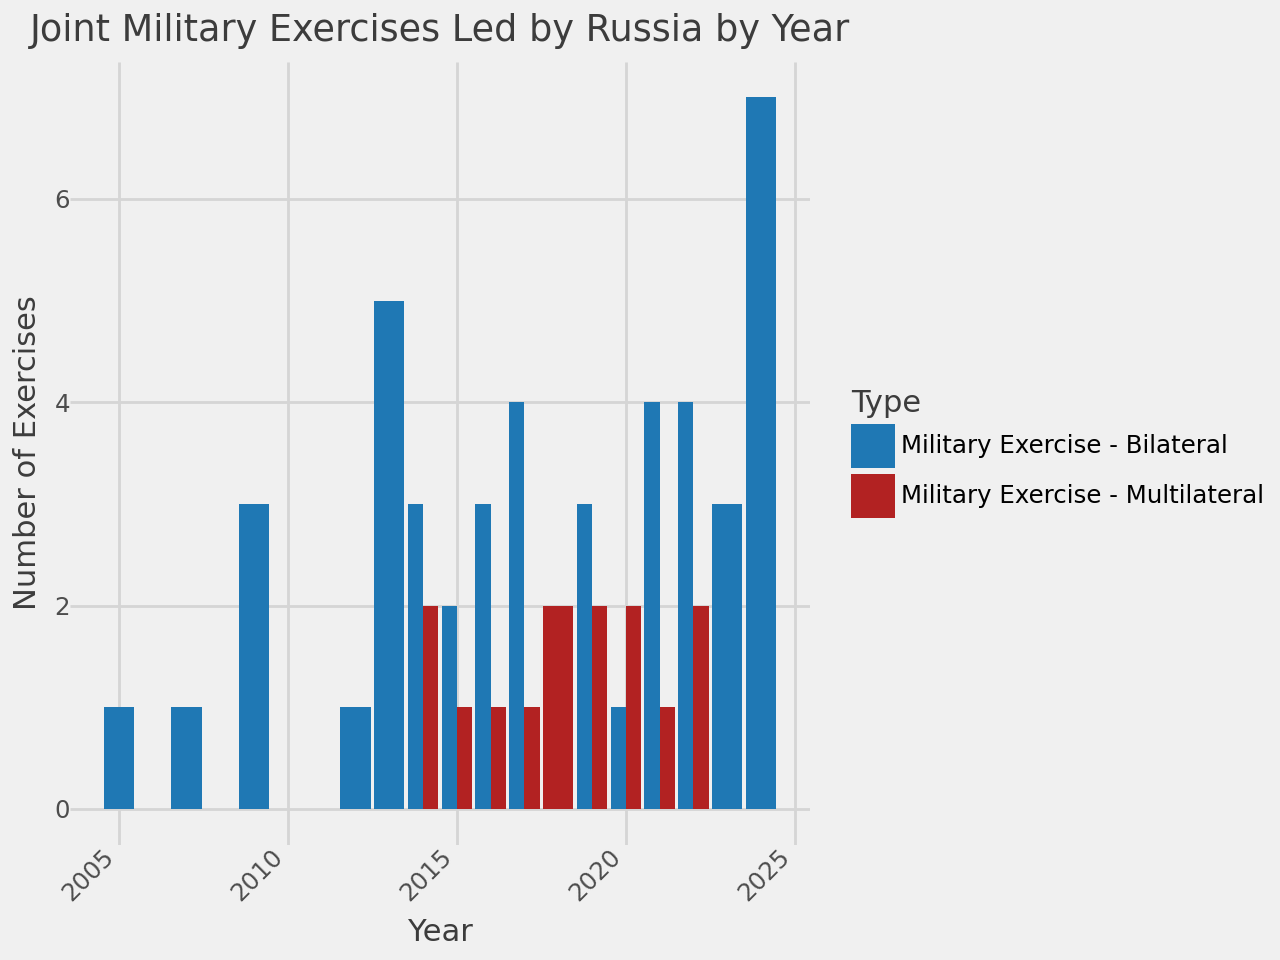

In [93]:
# plot by year and by type of exercise


(
    ggplot(military_exercise, aes(x='Year', fill='Activity Type'))
    + geom_bar(position='dodge')
    + theme_set(theme_538())
    + scale_fill_manual(
        values=["#1f78b4", "firebrick"],  # Example custom colors
        name="Type"                    # Legend title
    )
    + labs(
        title="Joint Military Exercises Led by Russia by Year",
        x="Year",
        y="Number of Exercises"
    )
    + theme(
        axis_text_x=element_text(rotation=45, hjust=1)
    )
)


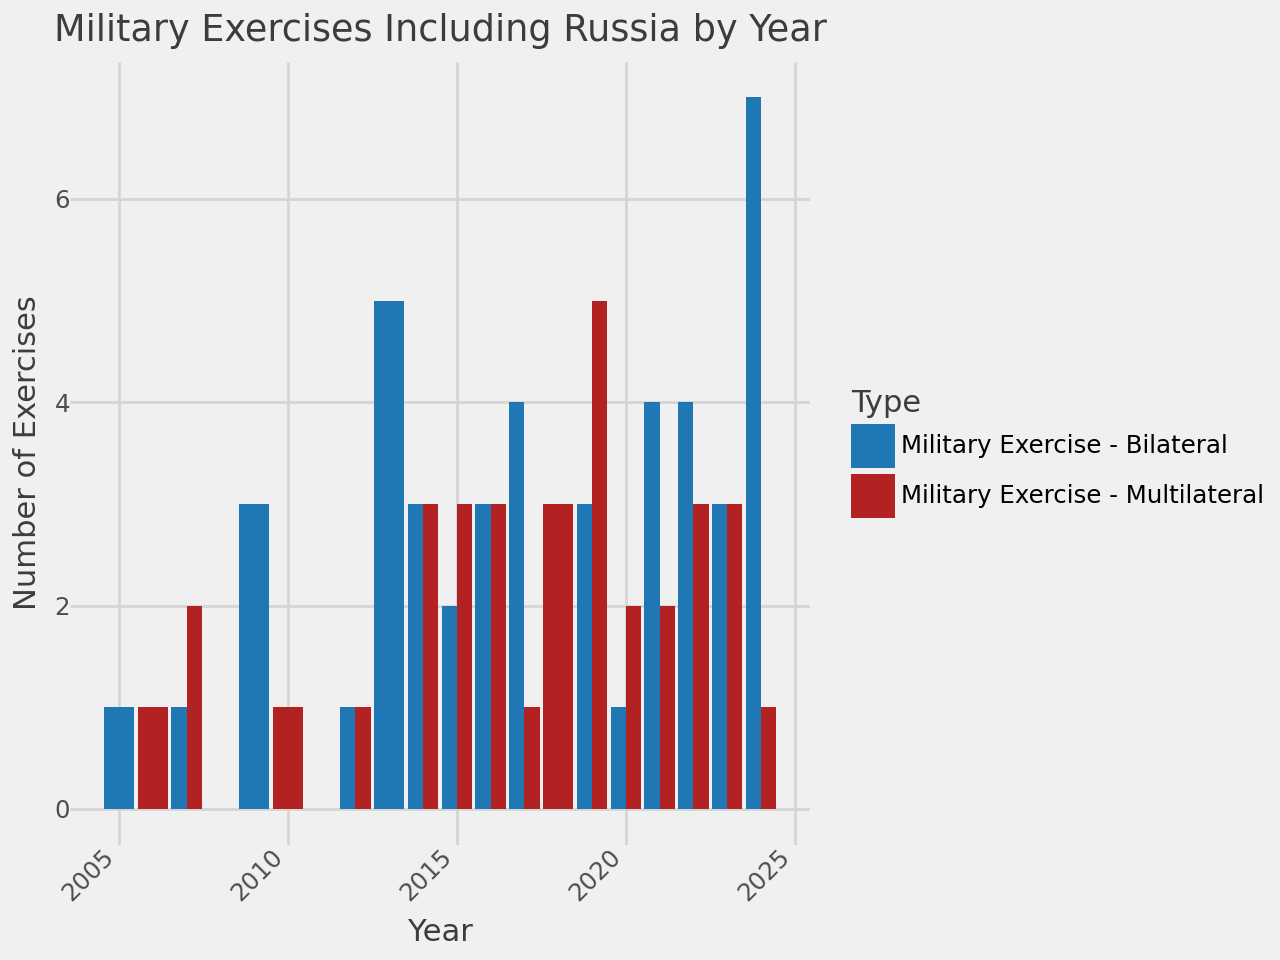

In [94]:
# plot by year and by type of exercise


(
    ggplot(exercisesWithRF, aes(x='Year', fill='Activity Type'))
    + geom_bar(position='dodge')
    + theme_set(theme_538())
    + scale_fill_manual(
        values=["#1f78b4", "firebrick"],  # Example custom colors
        name="Type"                    # Legend title
    )
    + labs(
        title="Military Exercises Including Russia by Year",
        x="Year",
        y="Number of Exercises"
    )
    + theme(
        axis_text_x=element_text(rotation=45, hjust=1)
    )
)


### Senior Level Visits with Partner Country == Russia

In [95]:
# filter russia_diplomacy for just Activity Category = Senior Level visit
senior_level_visit = russia_diplomacy[russia_diplomacy['Activity Category'] == 'Senior Level Visit']
senior_level_visit.head()

,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,U.S. Collective Defense Status,US CCMD AOR,Partner Country,Year,Month,Activity Type,...,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Port Call Voyage Identifier,Associated Fleet,Port Call Details,Source,Comments,Unnamed: 26
88,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2002,6.0,BL - Hosted,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CPP20020601000085,NaN,NaN
102,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2002,7.0,BL - Hosted,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JPP20020717000049,NaN,NaN
155,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2002,12.0,BL - Hosted,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CPP20021217000127,NaN,NaN
186,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2003,5.0,BL - Hosted,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Defense White Paper Appendix,NaN,NaN
187,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2003,5.0,BL - Abroad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Defense White Paper Appendix,NaN,NaN


In [96]:
senior_level_visit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 88 to 3346
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Activity Category               97 non-null     object 
 1   Geographic Region               97 non-null     object 
 2   Region (MND FAO)                97 non-null     object 
 3   PRC Relationship Category       97 non-null     object 
 4   U.S. Collective Defense Status  0 non-null      object 
 5   US CCMD AOR                     97 non-null     object 
 6   Partner Country                 97 non-null     object 
 7   Year                            97 non-null     int64  
 8   Month                           97 non-null     float64
 9   Activity Type                   97 non-null     object 
 10  Person                          97 non-null     object 
 11  Trip Count - Abroad             0 non-null      float64
 12  Position                        97 non-n

In [97]:
# drop all columns with 0 non-null entries
senior_level_visit.dropna(axis=1, how='all', inplace=True)
senior_level_visit.head()

/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/712683456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,US CCMD AOR,Partner Country,Year,Month,Activity Type,Person,Position,Position Weight,Visit Type,Visit Counterpart,MilEx Details,Source,Comments,Unnamed: 26
88,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2002,6.0,BL - Hosted,Chi Haotian,Defense Minister; CMC Member,8,Hosted,Defense Minister,NaN,CPP20020601000085,NaN,NaN
102,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2002,7.0,BL - Hosted,Chi Haotian,Defense Minister; CMC Member,8,Hosted,Security Council Secretary,NaN,JPP20020717000049,NaN,NaN
155,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2002,12.0,BL - Hosted,Chi Haotian,Defense Minister; CMC Member,8,Hosted,Chief of General Staff,NaN,CPP20021217000127,NaN,NaN
186,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2003,5.0,BL - Hosted,Cao Gangchuan,CMC Vice Chairman; Defense Minister,10,Hosted,Russian Ambassador to China,NaN,Defense White Paper Appendix,NaN,NaN
187,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2003,5.0,BL - Abroad,Cao Gangchuan,CMC Vice Chairman; Defense Minister,8,Abroad,NaN,NaN,Defense White Paper Appendix,NaN,NaN


In [98]:
# plot senior_level_visit by year

senior_level_visit ['Year'].value_counts().sort_index()

Year
2002    3
2003    5
2004    6
2005    5
2006    4
2007    3
2008    2
2009    4
2010    3
2011    5
2012    3
2013    4
2014    3
2015    6
2016    5
2017    3
2018    9
2019    5
2020    2
2021    4
2022    2
2023    7
2024    4
Name: count, dtype: int64

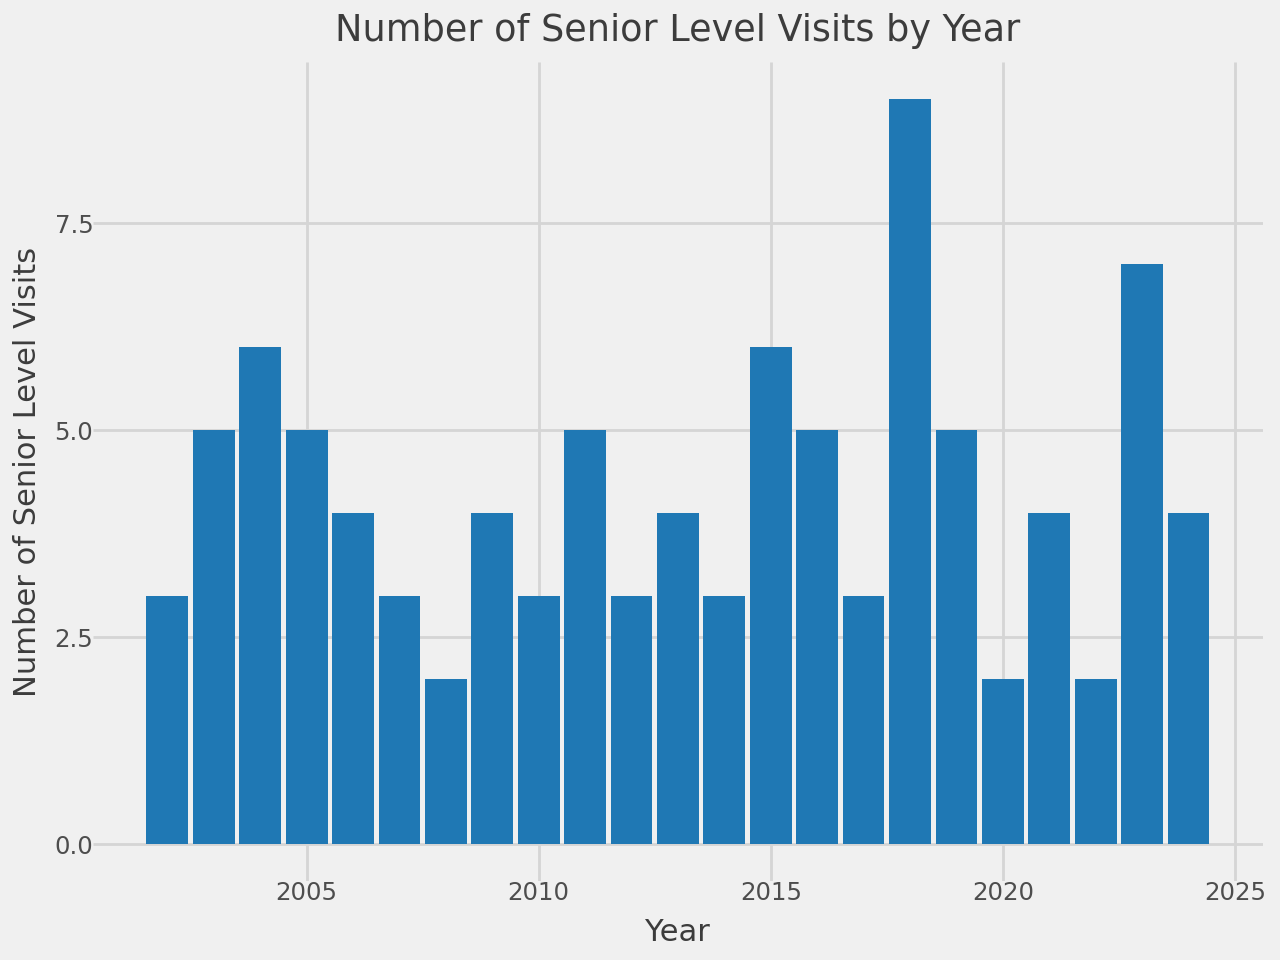

In [99]:
# Plot total senior level visits by year
(
    ggplot(senior_level_visit, aes(x='Year'))
    + geom_bar(fill="#1f78b4")
    + theme_set(theme_538())
    + labs(title="Number of Senior Level Visits by Year", x="Year", y="Number of Senior Level Visits")
)



In [100]:
senior_level_visit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 88 to 3346
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Activity Category          97 non-null     object 
 1   Geographic Region          97 non-null     object 
 2   Region (MND FAO)           97 non-null     object 
 3   PRC Relationship Category  97 non-null     object 
 4   US CCMD AOR                97 non-null     object 
 5   Partner Country            97 non-null     object 
 6   Year                       97 non-null     int64  
 7   Month                      97 non-null     float64
 8   Activity Type              97 non-null     object 
 9   Person                     97 non-null     object 
 10  Position                   97 non-null     object 
 11  Position Weight            97 non-null     object 
 12  Visit Type                 97 non-null     object 
 13  Visit Counterpart          75 non-null     object 
 14

In [101]:
senior_level_visit['Visit Counterpart'].unique()

array(['Defense Minister', 'Security Council Secretary',
       'Chief of General Staff', 'Russian Ambassador to China', nan,
       'First Deputy Director FSB',
       'First Deputy Chief of Staff Russian Armed Forces', 'COGS',
       'Army Commander', 'Chairman State Duma Defense Committee',
       'Deputy Defense Minister and COGS', 'Deputy Prime Minister',
       'First Deputy Defense Minister and COGS', 'DCOGS', 'Deputy PM',
       'Air Force Commander', 'Navy Commander',
       'DCOGS and concurrent Chief of Main Communications Directorate',
       'Deputy Minister',
       'Chief of General Staff Main Operational Directorate (J-5 equivalent)',
       'Commander of Northern Fleet',
       'Commander in Chief of Ground Forces', 'Chief of Defense Forces',
       'President', 'Deputy Defense Minister Andrey Kartapolov',
       'Russian Defense Minister',
       'Russian Defense Minister General of the Army ',
       'Defense Minister; BL at Xiangshan',
       'Deputy Director Federa

In [102]:
senior_level_visit['Position Weight'].unique()

array([8, 10, 6, 5], dtype=object)

/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/1451619940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


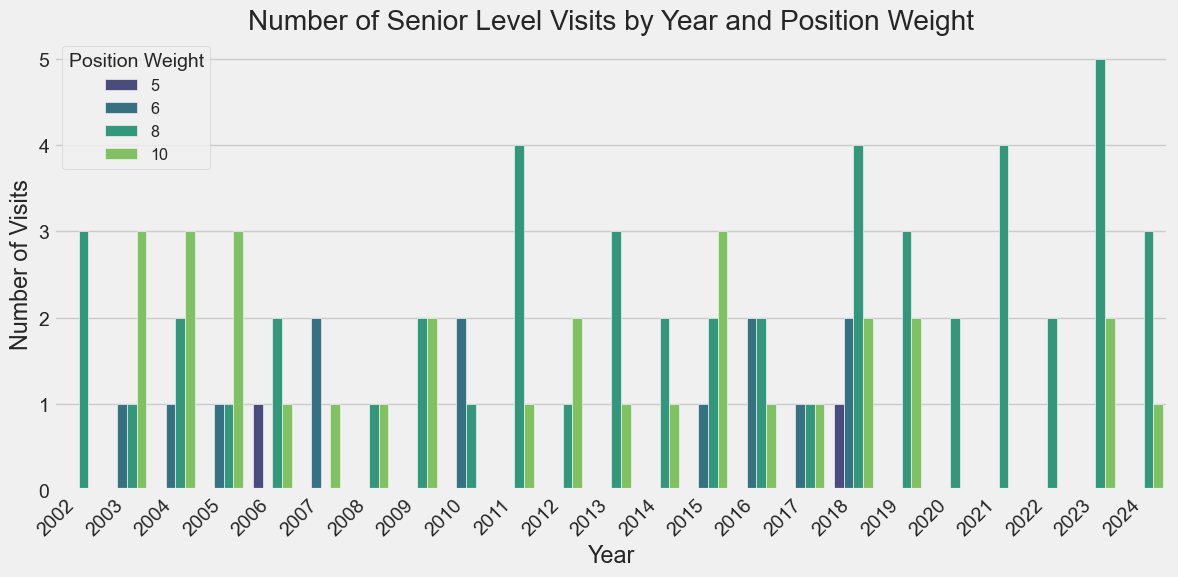

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Position Weight' is treated as categorical (if needed)
senior_level_visit['Position Weight'] = senior_level_visit['Position Weight'].astype('category')

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Year', hue='Position Weight', data=senior_level_visit, palette='viridis')
plt.title('Number of Senior Level Visits by Year and Position Weight')
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')

# Make legend smaller
plt.legend(title='Position Weight', fontsize='small')

plt.tight_layout()
plt.show()

In [104]:
import pandas as pd

# Group by year and position weight and count the number of visits
position_counts = senior_level_visit.groupby(['Year', 'Position Weight']).size().reset_index(name='Count')

# Pivot the data to have position weights as columns
position_counts_pivot = position_counts.pivot(index='Year', columns='Position Weight', values='Count').fillna(0)

# Display the results
print(position_counts_pivot)

# Calculate yearly totals
yearly_totals = position_counts.groupby('Year')['Count'].sum().reset_index()

# Display yearly totals
print("\nYearly Totals:\n", yearly_totals)

Position Weight  5  6  8  10
Year                        
2002             0  0  3   0
2003             0  1  1   3
2004             0  1  2   3
2005             0  1  1   3
2006             1  0  2   1
2007             0  2  0   1
2008             0  0  1   1
2009             0  0  2   2
2010             0  2  1   0
2011             0  0  4   1
2012             0  0  1   2
2013             0  0  3   1
2014             0  0  2   1
2015             0  1  2   3
2016             0  2  2   1
2017             0  1  1   1
2018             1  2  4   2
2019             0  0  3   2
2020             0  0  2   0
2021             0  0  4   0
2022             0  0  2   0
2023             0  0  5   2
2024             0  0  3   1

Yearly Totals:
     Year  Count
0   2002      3
1   2003      5
2   2004      6
3   2005      5
4   2006      4
5   2007      3
6   2008      2
7   2009      4
8   2010      3
9   2011      5
10  2012      3
11  2013      4
12  2014      3
13  2015      6
14  2016      5
15

/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/661574481.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [105]:
# prompt: calculate total visits by each position weight

# Calculate total visits by each position weight
position_totals = senior_level_visit.groupby('Position Weight')['Year'].count()
position_totals

/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/2804982362.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


Position Weight
5      2
6     13
8     51
10    31
Name: Year, dtype: int64

In [106]:
senior_level_visit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 88 to 3346
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Activity Category          97 non-null     object  
 1   Geographic Region          97 non-null     object  
 2   Region (MND FAO)           97 non-null     object  
 3   PRC Relationship Category  97 non-null     object  
 4   US CCMD AOR                97 non-null     object  
 5   Partner Country            97 non-null     object  
 6   Year                       97 non-null     int64   
 7   Month                      97 non-null     float64 
 8   Activity Type              97 non-null     object  
 9   Person                     97 non-null     object  
 10  Position                   97 non-null     object  
 11  Position Weight            97 non-null     category
 12  Visit Type                 97 non-null     object  
 13  Visit Counterpart          75 non-null 

##### Senior-Level visits by weight and year

##### Average senior level visits per year 2005-2011 and 2012-2024

In [107]:
import pandas as pd

# Ensure 'Position Weight' is treated as categorical (if needed)
senior_level_visit['Position Weight'] = senior_level_visit['Position Weight'].astype('category')


# Filter data for the two time periods
visits_2002_2011 = senior_level_visit[(senior_level_visit['Year'] >= 2002) & (senior_level_visit['Year'] <= 2011)]
visits_2012_2024 = senior_level_visit[(senior_level_visit['Year'] >= 2012) & (senior_level_visit['Year'] <= 2024)]



# Group by 'Position Weight' and count the number of visits, then calculate the average for 2002-2011
slv_average_2002_2011 = visits_2002_2011.groupby('Position Weight').size().reset_index(name='Count')
slv_average_2002_2011['Time Period'] = '2002-2011'
slv_average_2002_2011['Average Visits'] = slv_average_2002_2011['Count'] / len(visits_2002_2011['Year'].unique())
slv_average_2002_2011.drop('Count', axis = 1, inplace = True)

# Group by 'Position Weight' and count the number of visits, then calculate the average for 2012-2024
slv_average_2012_2024 = visits_2012_2024.groupby('Position Weight').size().reset_index(name='Count')
slv_average_2012_2024['Time Period'] = '2012-2024'
slv_average_2012_2024['Average Visits'] = slv_average_2012_2024['Count'] / len(visits_2012_2024['Year'].unique())
slv_average_2012_2024.drop('Count', axis = 1, inplace = True)

# Concatenate the two DataFrames
average_slvisits_by_period = pd.concat([slv_average_2002_2011, slv_average_2012_2024])


# Print the results
print(average_slvisits_by_period)

  Position Weight Time Period  Average Visits
0               5   2002-2011        0.100000
1               6   2002-2011        0.700000
2               8   2002-2011        1.700000
3              10   2002-2011        1.500000
0               5   2012-2024        0.076923
1               6   2012-2024        0.461538
2               8   2012-2024        2.615385
3              10   2012-2024        1.230769


/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/4027900688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/4027900688.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/4027900688.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this w

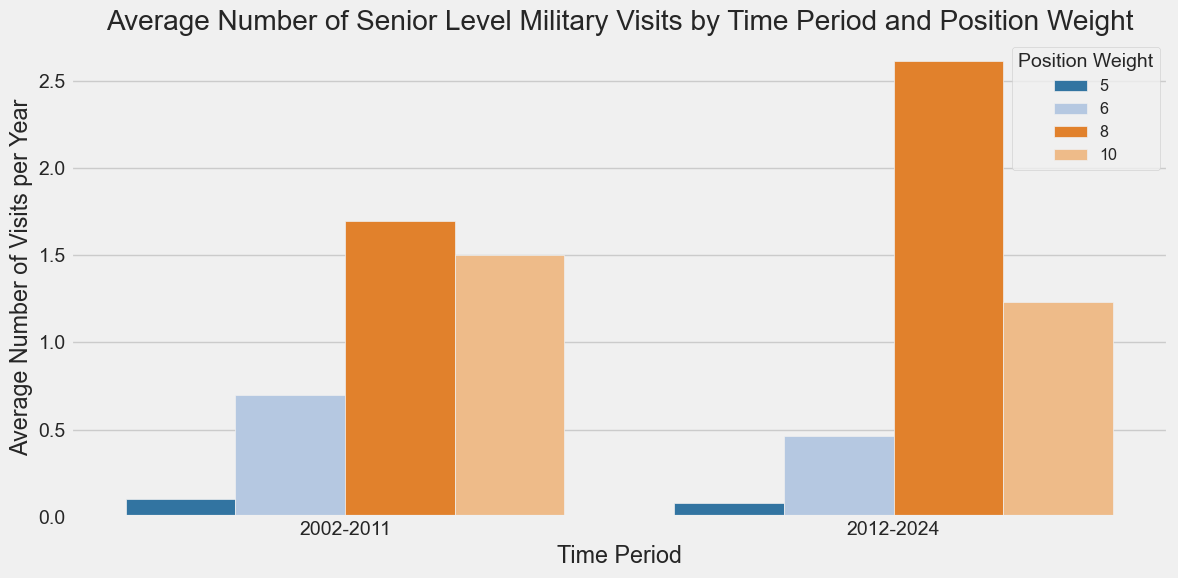

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'average_by_period' DataFrame is already created

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Time Period', y='Average Visits', hue='Position Weight', data=average_slvisits_by_period, palette='tab20')

plt.title('Average Number of Senior Level Military Visits by Time Period and Position Weight')
plt.xlabel('Time Period')
plt.ylabel('Average Number of Visits per Year')
plt.legend(title='Position Weight', fontsize='small')
plt.tight_layout()
plt.show()

Position weight 8 more than doubled.  It represents CMC members and service commanders.

##### Average senior level visits per year 2005-2013 and 2014-2024

In [109]:

# Filter data for the two time periods
visits_2002_2013 = senior_level_visit[(senior_level_visit['Year'] >= 2002) & (senior_level_visit['Year'] <= 2013)]
visits_2014_2024 = senior_level_visit[(senior_level_visit['Year'] >= 2014) & (senior_level_visit['Year'] <= 2024)]



# Group by 'Position Weight' and count the number of visits, then calculate the average for 2002-2011
slv_average_2002_2013 = visits_2002_2013.groupby('Position Weight').size().reset_index(name='Count')
slv_average_2002_2013['Time Period'] = '2002-2013'
slv_average_2002_2013['Average Visits'] = slv_average_2002_2013['Count'] / len(visits_2002_2013['Year'].unique())
slv_average_2002_2013.drop('Count', axis = 1, inplace = True)

# Group by 'Position Weight' and count the number of visits, then calculate the average for 2012-2024
slv_average_2014_2024 = visits_2014_2024.groupby('Position Weight').size().reset_index(name='Count')
slv_average_2014_2024['Time Period'] = '2014-2024'
slv_average_2014_2024['Average Visits'] = slv_average_2014_2024['Count'] / len(visits_2014_2024['Year'].unique())
slv_average_2014_2024.drop('Count', axis = 1, inplace = True)

# Concatenate the two DataFrames
average_slvisits_by_period2 = pd.concat([slv_average_2002_2013, slv_average_2014_2024])


# Print the results
print(average_slvisits_by_period2)

  Position Weight Time Period  Average Visits
0               5   2002-2013        0.083333
1               6   2002-2013        0.583333
2               8   2002-2013        1.750000
3              10   2002-2013        1.500000
0               5   2014-2024        0.090909
1               6   2014-2024        0.545455
2               8   2014-2024        2.727273
3              10   2014-2024        1.181818


/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/1846070436.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/1846070436.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


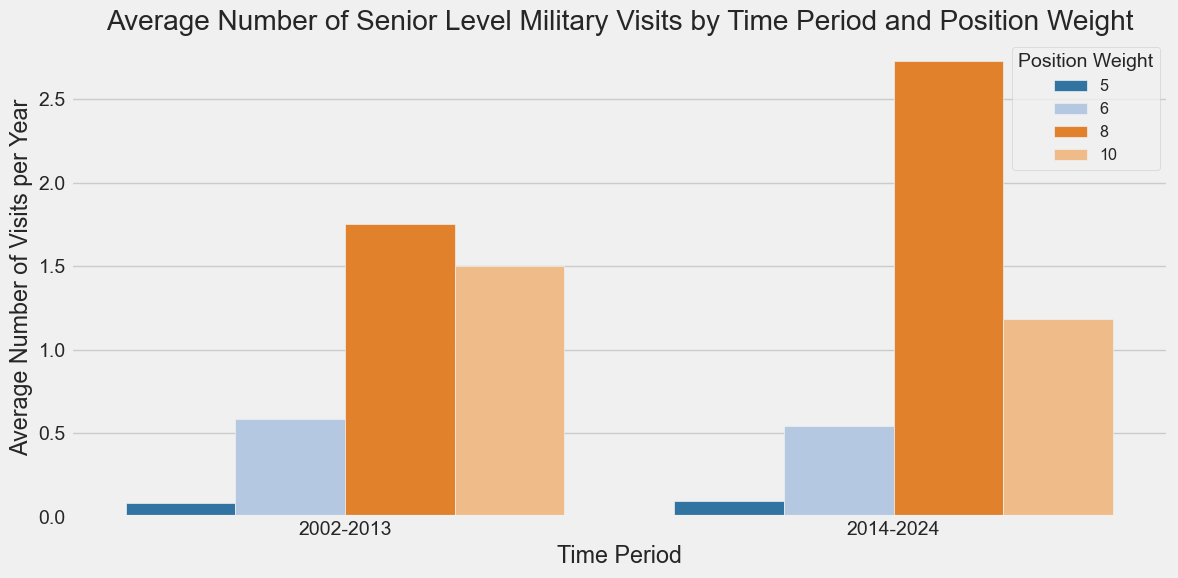

In [110]:

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Time Period', y='Average Visits', hue='Position Weight', data=average_slvisits_by_period2, palette='tab20')

plt.title('Average Number of Senior Level Military Visits by Time Period and Position Weight')
plt.xlabel('Time Period')
plt.ylabel('Average Number of Visits per Year')
plt.legend(title='Position Weight', fontsize='small')
plt.tight_layout()
plt.show()

#### Location of Senior Level Visits


In [111]:
senior_level_visit.head()

,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,US CCMD AOR,Partner Country,Year,Month,Activity Type,Person,Position,Position Weight,Visit Type,Visit Counterpart,MilEx Details,Source,Comments,Unnamed: 26
88,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2002,6.0,BL - Hosted,Chi Haotian,Defense Minister; CMC Member,8,Hosted,Defense Minister,NaN,CPP20020601000085,NaN,NaN
102,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2002,7.0,BL - Hosted,Chi Haotian,Defense Minister; CMC Member,8,Hosted,Security Council Secretary,NaN,JPP20020717000049,NaN,NaN
155,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2002,12.0,BL - Hosted,Chi Haotian,Defense Minister; CMC Member,8,Hosted,Chief of General Staff,NaN,CPP20021217000127,NaN,NaN
186,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2003,5.0,BL - Hosted,Cao Gangchuan,CMC Vice Chairman; Defense Minister,10,Hosted,Russian Ambassador to China,NaN,Defense White Paper Appendix,NaN,NaN
187,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],EUCOM,Russia,2003,5.0,BL - Abroad,Cao Gangchuan,CMC Vice Chairman; Defense Minister,8,Abroad,NaN,NaN,Defense White Paper Appendix,NaN,NaN


BL Abroad is a bilateral meeting abroad (in Russia in this case).  BL Hosted is a bilateral meeting in China.  

In [112]:
senior_level_visit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 88 to 3346
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Activity Category          97 non-null     object  
 1   Geographic Region          97 non-null     object  
 2   Region (MND FAO)           97 non-null     object  
 3   PRC Relationship Category  97 non-null     object  
 4   US CCMD AOR                97 non-null     object  
 5   Partner Country            97 non-null     object  
 6   Year                       97 non-null     int64   
 7   Month                      97 non-null     float64 
 8   Activity Type              97 non-null     object  
 9   Person                     97 non-null     object  
 10  Position                   97 non-null     object  
 11  Position Weight            97 non-null     category
 12  Visit Type                 97 non-null     object  
 13  Visit Counterpart          75 non-null 

In [113]:
senior_level_visit['Visit Type '].unique()

array(['Hosted', 'Abroad', 'Virtual'], dtype=object)

Correcting typoes in the data entry that would skew the data results.

In [115]:
# prompt: rename senior_level_visit['Visit Type '] as senior_level_visit['Visit Type']

senior_level_visit.rename(columns={'Visit Type ': 'Visit Type'}, inplace=True)

/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/2574759975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/67/ny3b7b2j3k9gbk6psky4q6wh0000gp/T/ipykernel_32479/2498718330.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


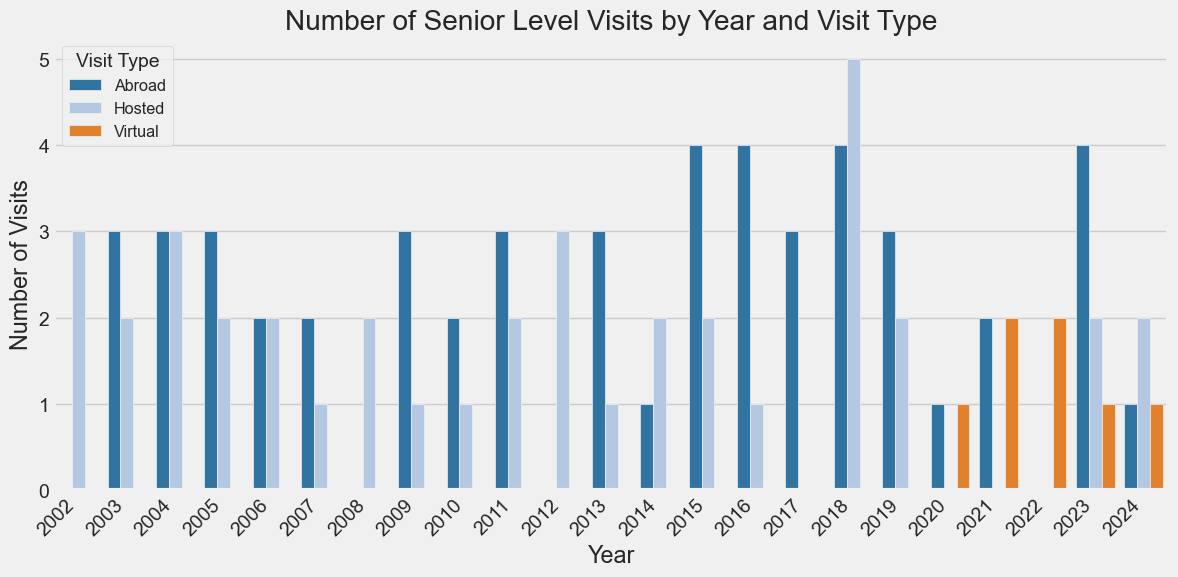

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Visit Type' is treated as a category
senior_level_visit['Visit Type'] = senior_level_visit['Visit Type'].astype('category')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Visit Type', data=senior_level_visit, palette='tab20')

plt.title('Number of Senior Level Visits by Year and Visit Type')
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Visit Type', fontsize='small')
plt.tight_layout()
plt.show()

In [117]:
# prompt: calculate average hosted per year and average abroad visits per year

# Assuming 'senior_level_visit' DataFrame is already created and processed.

# Calculate average hosted visits per year
hosted_visits = senior_level_visit[senior_level_visit['Visit Type'] == 'Hosted']
average_hosted_per_year = hosted_visits.groupby('Year')['Visit Type'].count().mean()
print(f"Average hosted visits per year: {average_hosted_per_year:.2f}")

# Calculate average abroad visits per year
abroad_visits = senior_level_visit[senior_level_visit['Visit Type'] == 'Abroad']
average_abroad_per_year = abroad_visits.groupby('Year')['Visit Type'].count().mean()
print(f"Average abroad visits per year: {average_abroad_per_year:.2f}")

Average hosted visits per year: 2.05
Average abroad visits per year: 2.68


In [118]:
# prompt: calculate average hosted per year for the period 2002-2011 and average abroad per year for the period 2002-2011 and then calculate average hosted per year for the period 2012-2024 and average abroad per year for the period 2012-2024

# Assuming 'senior_level_visit' DataFrame is already created and processed.

# Filter data for the two time periods
visits_2002_2011 = senior_level_visit[(senior_level_visit['Year'] >= 2002) & (senior_level_visit['Year'] <= 2011)]
visits_2012_2024 = senior_level_visit[(senior_level_visit['Year'] >= 2012) & (senior_level_visit['Year'] <= 2024)]

# Calculate average hosted visits per year for 2002-2011
hosted_visits_2002_2011 = visits_2002_2011[visits_2002_2011['Visit Type'] == 'Hosted']
average_hosted_2002_2011 = hosted_visits_2002_2011.groupby('Year')['Visit Type'].count().mean()

# Calculate average abroad visits per year for 2002-2011
abroad_visits_2002_2011 = visits_2002_2011[visits_2002_2011['Visit Type'] == 'Abroad']
average_abroad_2002_2011 = abroad_visits_2002_2011.groupby('Year')['Visit Type'].count().mean()

# Calculate average hosted visits per year for 2012-2024
hosted_visits_2012_2024 = visits_2012_2024[visits_2012_2024['Visit Type'] == 'Hosted']
average_hosted_2012_2024 = hosted_visits_2012_2024.groupby('Year')['Visit Type'].count().mean()

# Calculate average abroad visits per year for 2012-2024
abroad_visits_2012_2024 = visits_2012_2024[visits_2012_2024['Visit Type'] == 'Abroad']
average_abroad_2012_2024 = abroad_visits_2012_2024.groupby('Year')['Visit Type'].count().mean()


print(f"Average hosted visits per year (2002-2011): {average_hosted_2002_2011:.2f}")
print(f"Average abroad visits per year (2002-2011): {average_abroad_2002_2011:.2f}")
print(f"Average hosted visits per year (2012-2024): {average_hosted_2012_2024:.2f}")
print(f"Average abroad visits per year (2012-2024): {average_abroad_2012_2024:.2f}")

Average hosted visits per year (2002-2011): 1.90
Average abroad visits per year (2002-2011): 2.62
Average hosted visits per year (2012-2024): 2.22
Average abroad visits per year (2012-2024): 2.73


In [119]:
import pandas as pd
from scipy import stats

# Assuming your DataFrame is named senior_level_visit and has 'Year', 'Visit Type' columns
# Filter data for the two time periods
visits_2002_2011 = senior_level_visit[(senior_level_visit['Year'] >= 2002) & (senior_level_visit['Year'] <= 2011)]
visits_2012_2024 = senior_level_visit[(senior_level_visit['Year'] >= 2012) & (senior_level_visit['Year'] <= 2024)]


# Separate hosted and abroad visits
hosted_2002_2011 = visits_2002_2011[visits_2002_2011['Visit Type'] == 'Hosted']['Year'].value_counts()
abroad_2002_2011 = visits_2002_2011[visits_2002_2011['Visit Type'] == 'Abroad']['Year'].value_counts()

hosted_2012_2024 = visits_2012_2024[visits_2012_2024['Visit Type'] == 'Hosted']['Year'].value_counts()
abroad_2012_2024 = visits_2012_2024[visits_2012_2024['Visit Type'] == 'Abroad']['Year'].value_counts()

# Perform t-tests
t_stat_hosted, p_val_hosted = stats.ttest_ind(hosted_2002_2011, hosted_2012_2024, equal_var=False, nan_policy = 'omit')
t_stat_abroad, p_val_abroad = stats.ttest_ind(abroad_2002_2011, abroad_2012_2024, equal_var=False, nan_policy = 'omit')


print(f"T-test for hosted visits: t-statistic = {t_stat_hosted:.2f}, p-value = {p_val_hosted:.3f}")
print(f"T-test for abroad visits: t-statistic = {t_stat_abroad:.2f}, p-value = {p_val_abroad:.3f}")

# Interpret the results
alpha = 0.05
if p_val_hosted < alpha:
    print("The difference in average hosted visits is statistically significant.")
else:
    print("The difference in average hosted visits is not statistically significant.")

if p_val_abroad < alpha:
    print("The difference in average abroad visits is statistically significant.")
else:
    print("The difference in average abroad visits is not statistically significant.")

T-test for hosted visits: t-statistic = -0.70, p-value = 0.499
T-test for abroad visits: t-statistic = -0.24, p-value = 0.813
The difference in average hosted visits is not statistically significant.
The difference in average abroad visits is not statistically significant.
